In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




load data set


In [2]:
df=pd.read_csv(r"D:\Employee Attrition\Employee-Attrition - Employee-Attrition - Copy.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
pd.options.display.max_columns=None
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
print(df['Attrition'].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64


Preprocessing steps

EmployeeCount, Over18, StandardHours → always the same, no predictive value.

In [5]:
df=df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [5]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [26]:
numerical_features=df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


EDA before scaling

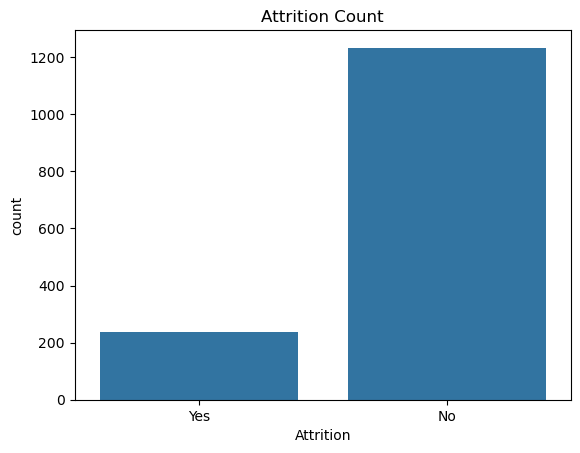

In [6]:
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()

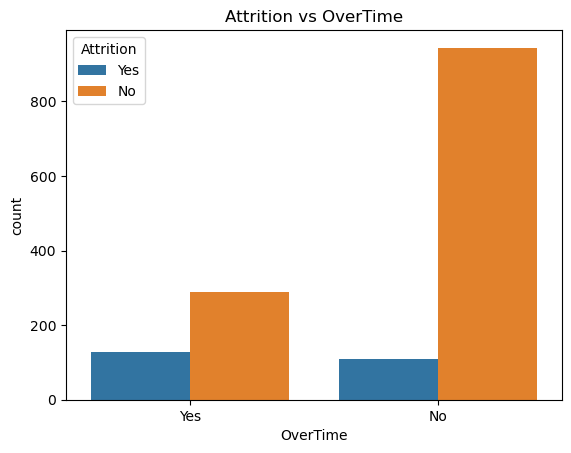

In [7]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition vs OverTime')
plt.show()

percentage of employees who left in each overtime category.
OverTime is likely a highly predictive feature for  model.

In [23]:
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})
print(df.groupby('OverTime')['Attrition_numeric'].mean())

OverTime
No     0.104364
Yes    0.305288
Name: Attrition_numeric, dtype: float64


0.104 → About 10.4% of employees who don’t work overtime left the company.

0.305 → About 30.5% of employees who do work overtime left the company.

Class Imbalance Check

In [8]:
print(df['Attrition'].value_counts(normalize=True))

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


0 0.838776 → About 83.9% of employees did not leave (Attrition = 0).

1 0.161224 → About 16.1% of employees left (Attrition = 1).

So  dataset is imbalanced: the majority class (no attrition) is much larger than the minority class (attrition).

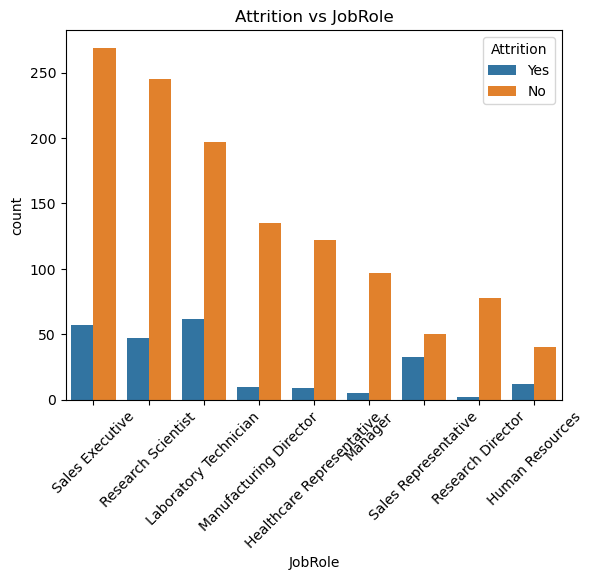

In [9]:
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Attrition vs JobRole')
plt.show()

In [21]:
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})
role_attrition_rate = df.groupby('JobRole')['Attrition_numeric'].mean().sort_values(ascending=False)
print(role_attrition_rate)

JobRole
Sales Representative         0.397590
Laboratory Technician        0.239382
Human Resources              0.230769
Sales Executive              0.174847
Research Scientist           0.160959
Manufacturing Director       0.068966
Healthcare Representative    0.068702
Manager                      0.049020
Research Director            0.025000
Name: Attrition_numeric, dtype: float64


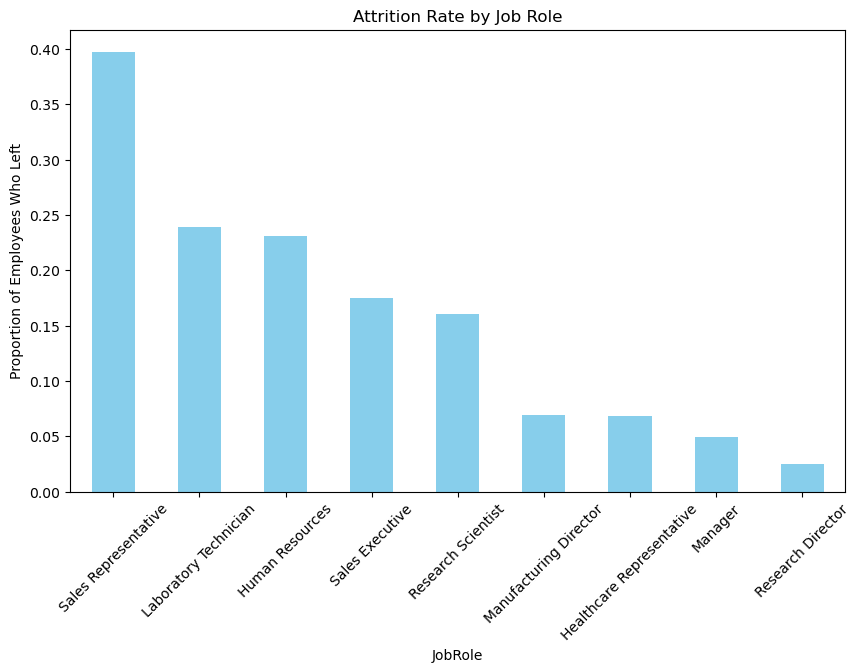

In [22]:
role_attrition_rate.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Attrition Rate by Job Role')
plt.ylabel('Proportion of Employees Who Left')
plt.xticks(rotation=45)
plt.show()

Bar height: Higher bar = more people left from that role.
Sales Representative has the highest attrition rate (~40%).
Laboratory Technician and Human Resources also show elevated attrition (~23–24%).
These roles may be:

High-pressure

Lower-paying

Less satisfying

Which roles are stable:
Research Director, Manager, and Healthcare Representative have low attrition rates (<7%).
These roles may offer:

Better compensation

Career growth

Work-life balance

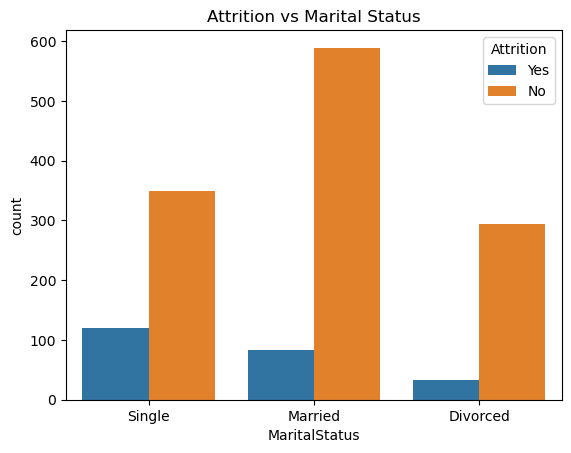

In [10]:
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Attrition vs Marital Status')
plt.show()

Marital status could be a useful feature in  model.

HR teams might consider targeted engagement strategies for single employees — like mentorship, career growth, or flexible work options.

In [24]:
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})
print(df.groupby('MaritalStatus')['Attrition_numeric'].mean())

MaritalStatus
Divorced    0.100917
Married     0.124814
Single      0.255319
Name: Attrition_numeric, dtype: float64


Single: 25.5% attrition — highest risk group

Married: 12.5% attrition — moderate risk

Divorced: 10.1% attrition — lowest risk

Attrition vs Job Satisfaction

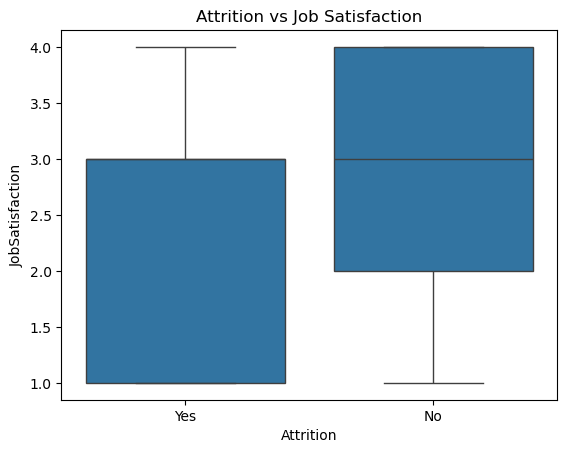

In [14]:
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Attrition vs Job Satisfaction')
plt.show()

Attrition vs Environment Satisfaction

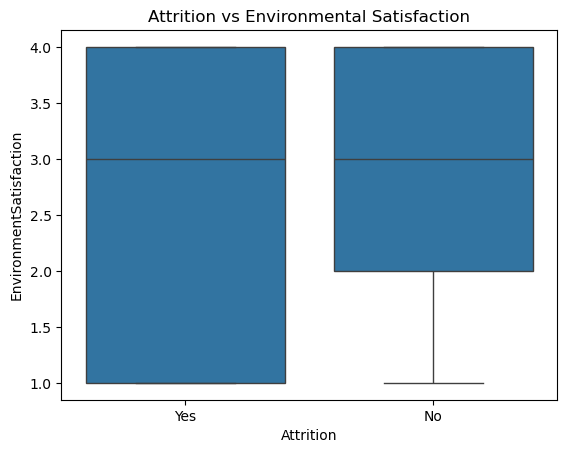

In [15]:
sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=df)
plt.title('Attrition vs Environmental Satisfaction')
plt.show()

Attrition vs Monthly Income

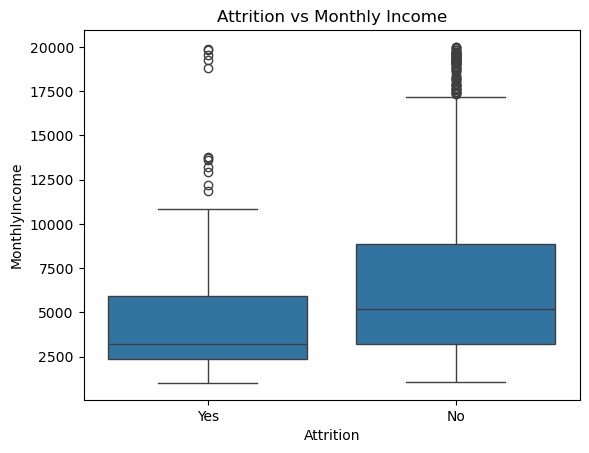

In [16]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Attrition vs Monthly Income')
plt.show()

Attrition vs Age

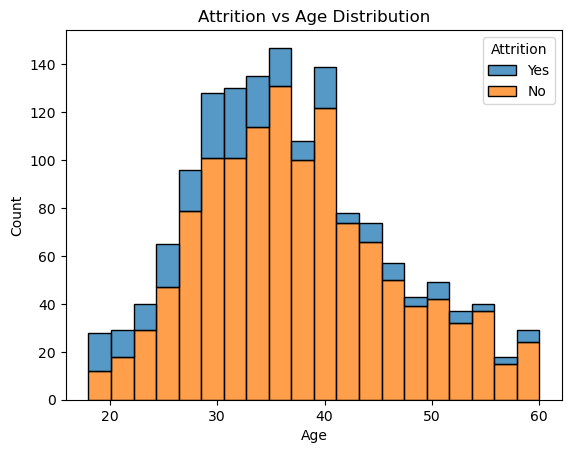

In [17]:
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', bins=20)
plt.title('Attrition vs Age Distribution')
plt.show()

Younger employees leave more
In age groups like 25–35, the blue portion is larger — meaning more people left.

Younger employees may be:

Exploring career options

Less satisfied

Older employees stay more
In age groups like 40+, the orange portion dominates — meaning most stayed.

Older employees may value:

Stability

Benefits

Long-term career paths

Attrition vs Years at Company

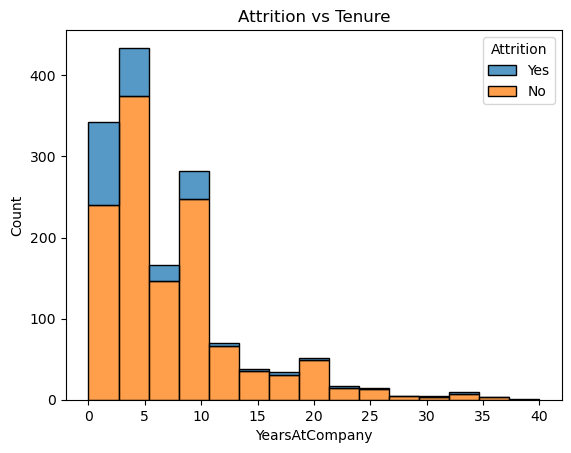

In [18]:
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack', bins=15)
plt.title('Attrition vs Tenure')
plt.show()

Most attrition happens early
In the first few years (especially 0–3 years), the blue portion is large.

This means many employees leave early in their tenure.

Long-tenured employees stay
After about 5+ years, the bars are mostly orange — meaning most employees who’ve stayed that long don’t leave.

The longer someone stays, the more likely they are to remain.

Tenure is a strong predictor of attrition.

Attrition vs Work-Life Balance

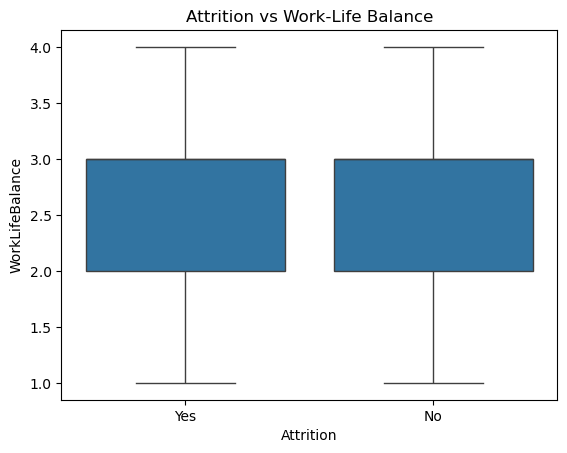

In [19]:
sns.boxplot(x='Attrition', y='WorkLifeBalance', data=df)
plt.title('Attrition vs Work-Life Balance')
plt.show()

Both groups have similar medians
The middle line in both boxes is around 3, meaning most employees — whether they stayed or left — rated their work-life balance as “good.”

But combinations will help for better prediction

Encode categorical variables (for modeling)

In [25]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

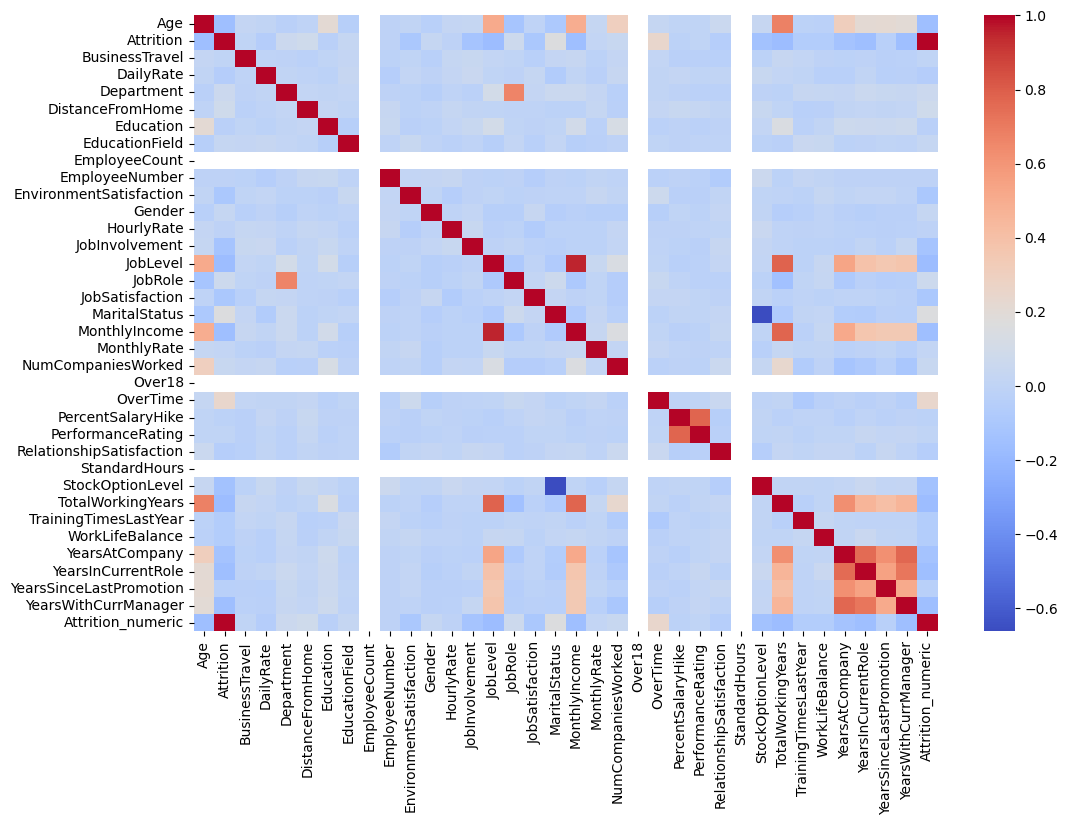

In [46]:
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

“Monthly Income” and “Job Level” = dark red → higher job level means higher income.

“Overtime” and “Work-Life Balance” = dark blue → more overtime hurts balance.

Age” and “Attrition” = light color → age doesn’t strongly affect attrition

In [47]:
corr_matrix = df_encoded.corr().abs()

# Step 1: Look at correlations above 0.9
high_corr = corr_matrix[corr_matrix > 0.9]

print(high_corr)

                          Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.0        NaN             NaN        NaN   
Attrition                 NaN        1.0             NaN        NaN   
BusinessTravel            NaN        NaN             1.0        NaN   
DailyRate                 NaN        NaN             NaN        1.0   
Department                NaN        NaN             NaN        NaN   
DistanceFromHome          NaN        NaN             NaN        NaN   
Education                 NaN        NaN             NaN        NaN   
EducationField            NaN        NaN             NaN        NaN   
EmployeeCount             NaN        NaN             NaN        NaN   
EmployeeNumber            NaN        NaN             NaN        NaN   
EnvironmentSatisfaction   NaN        NaN             NaN        NaN   
Gender                    NaN        NaN             NaN        NaN   
HourlyRate                NaN        NaN             NaN        NaN   
JobInv

Separate target and features

In [26]:
target=df_encoded['Attrition']
features= df_encoded.drop('Attrition', axis=1)

In [36]:
features_original = features.copy()

cap outliers before scaling

In [37]:
import numpy as np

def cap_outliers_all(df,lower_quantile=0.01, upper_quantile=0.99):# Define a function to cap outliers at given percentiles
    numerical_cols = df.select_dtypes(include=[np.number]).columns # Select all numeric columns in the DataFrame
    for col in numerical_cols: # Iterate through each numeric column
        lower_bound = df[col].quantile(lower_quantile) # Calculate the lower bound at the specified lower quantile
        upper_bound = df[col].quantile(upper_quantile) # Calculate the upper bound at the specified upper quantile
        df[col]=np.clip(df[col], lower_bound, upper_bound)  # Cap values: push anything below lower_bound up, and anything above upper_bound down
    
    return df   # Return the DataFrame with capped values

features_capped=cap_outliers_all(features.copy()) # Now all numeric columns in 'features' have their outliers capped

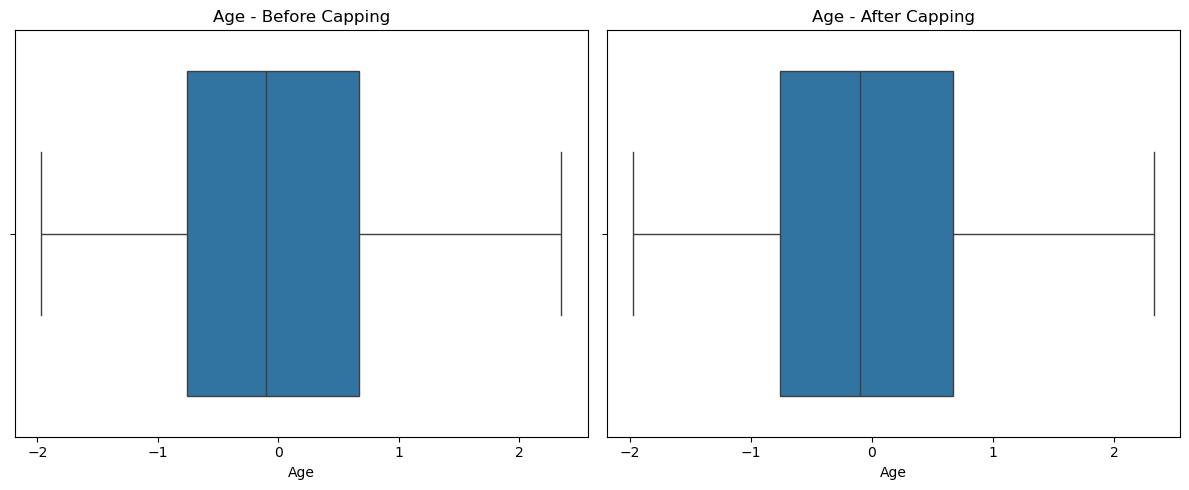

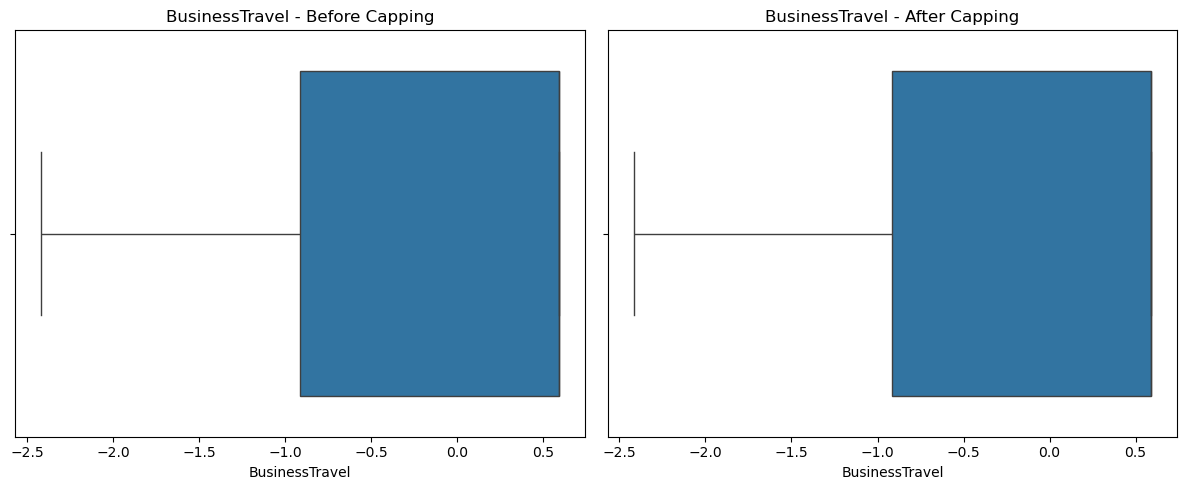

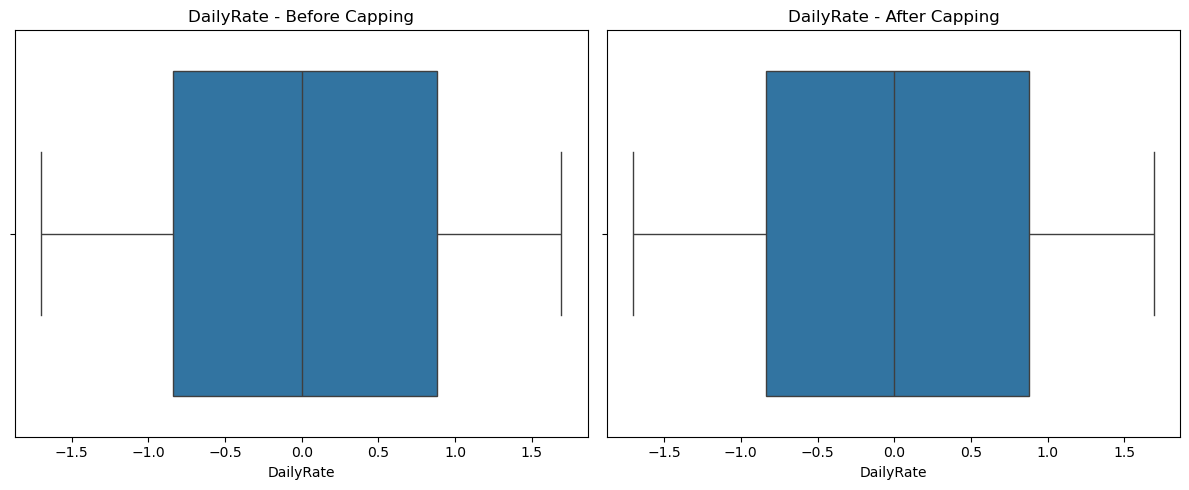

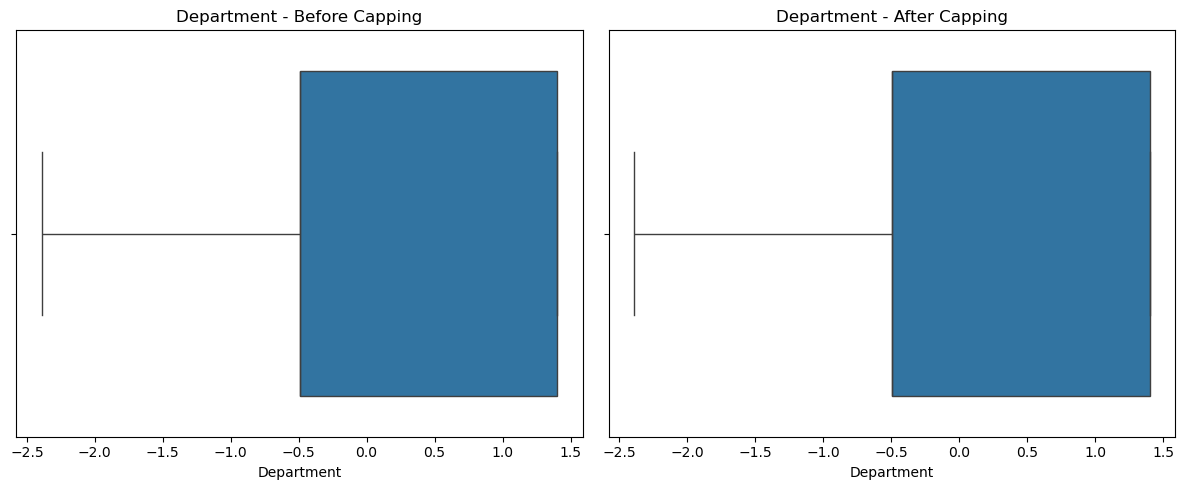

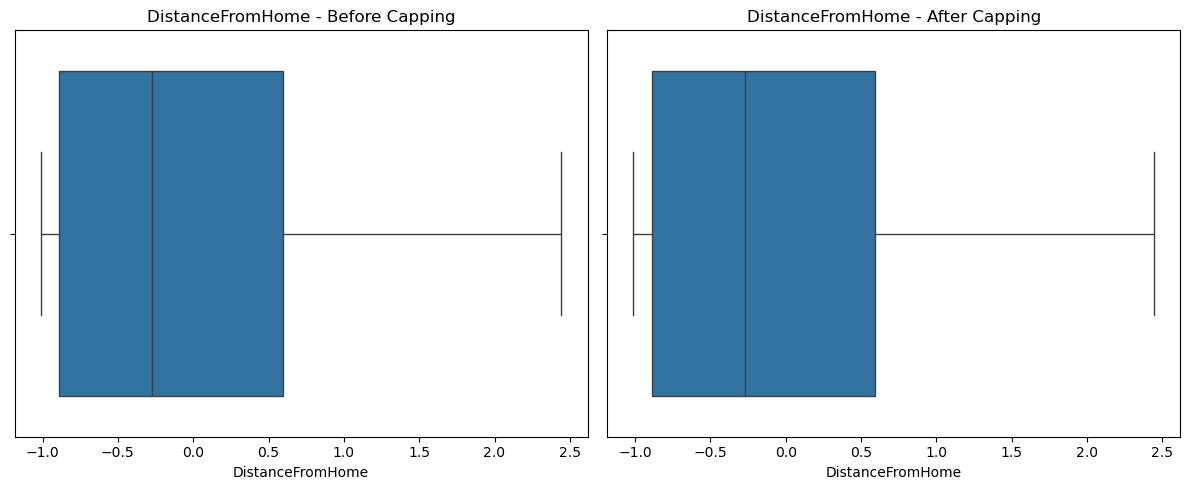

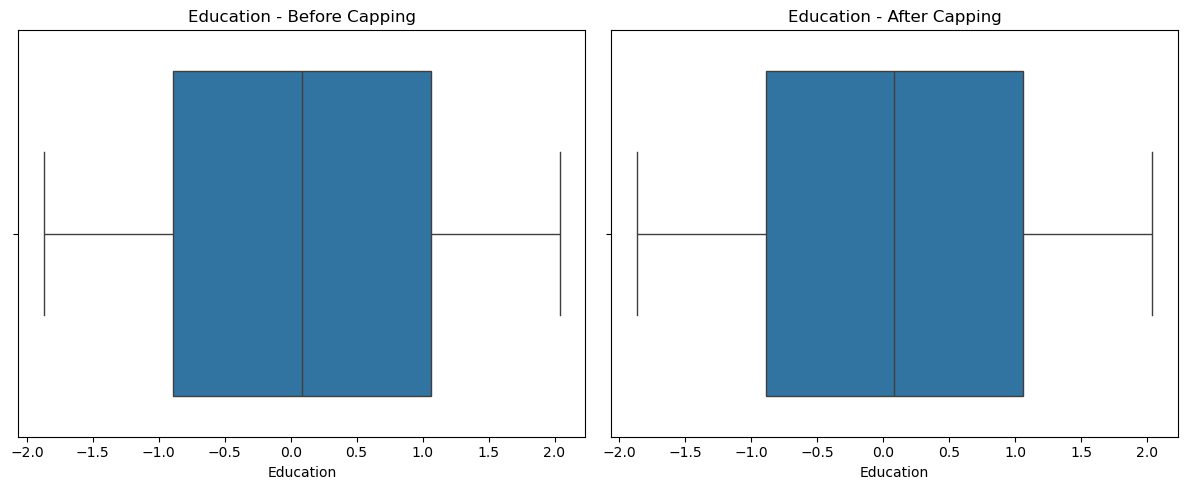

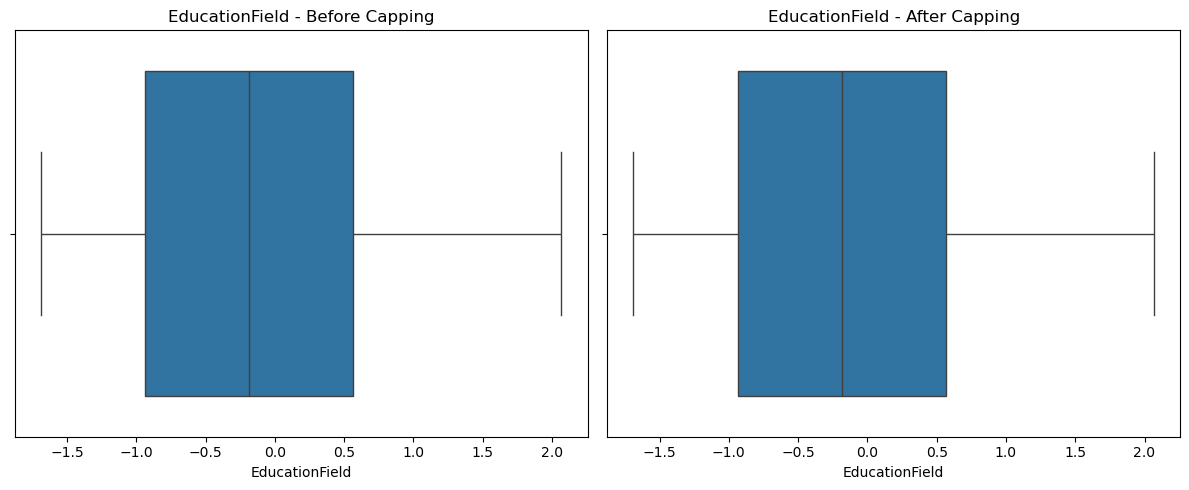

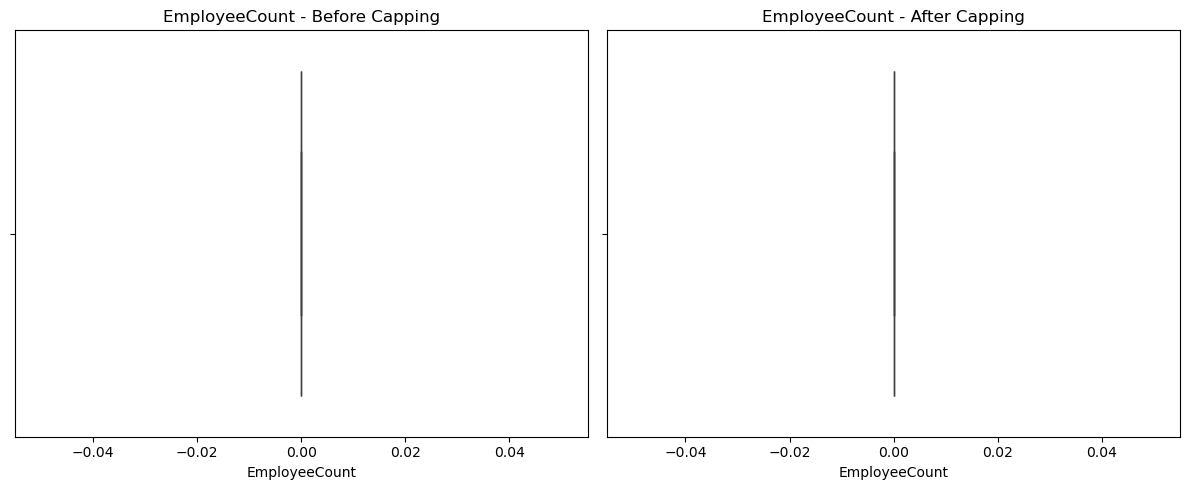

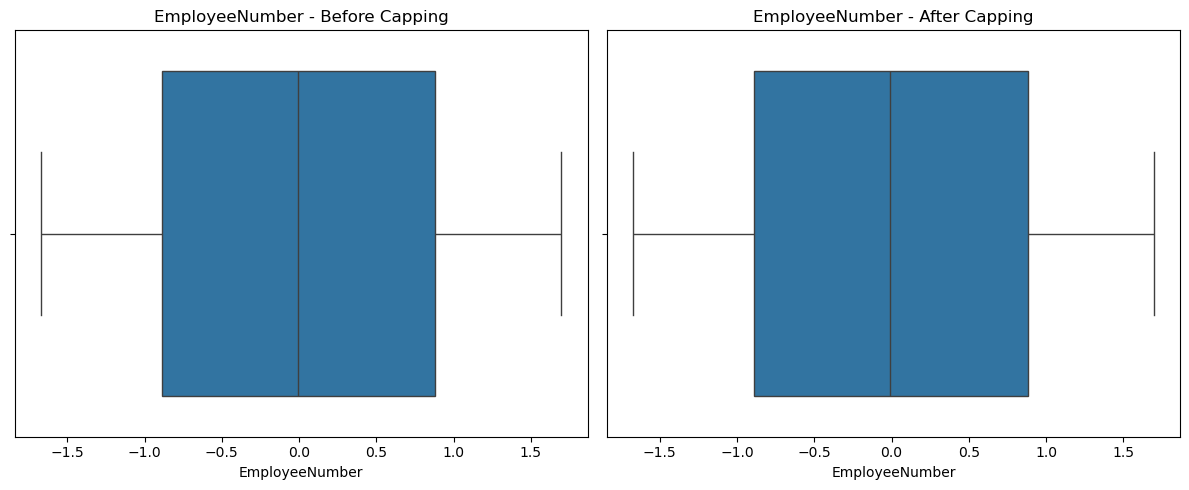

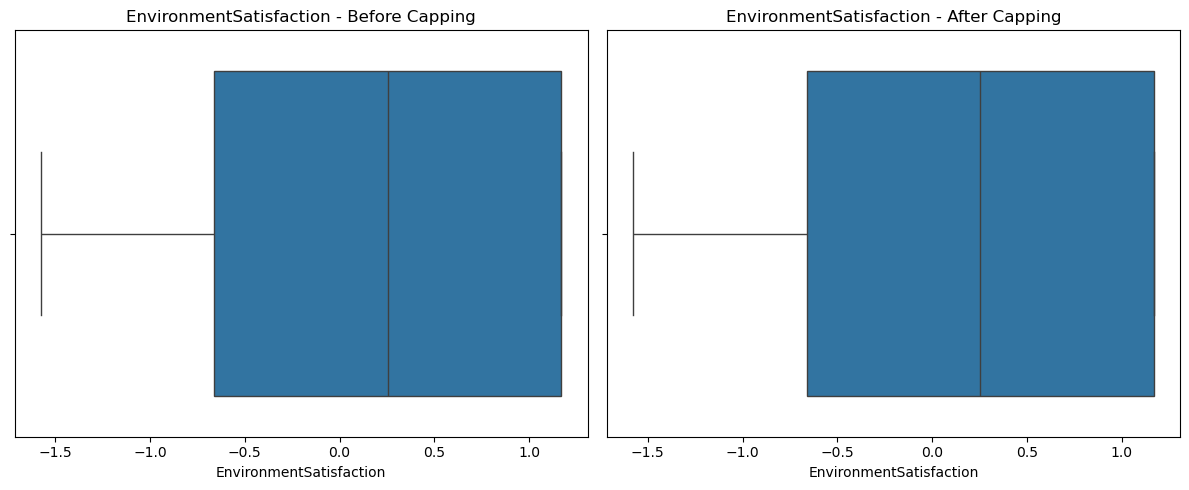

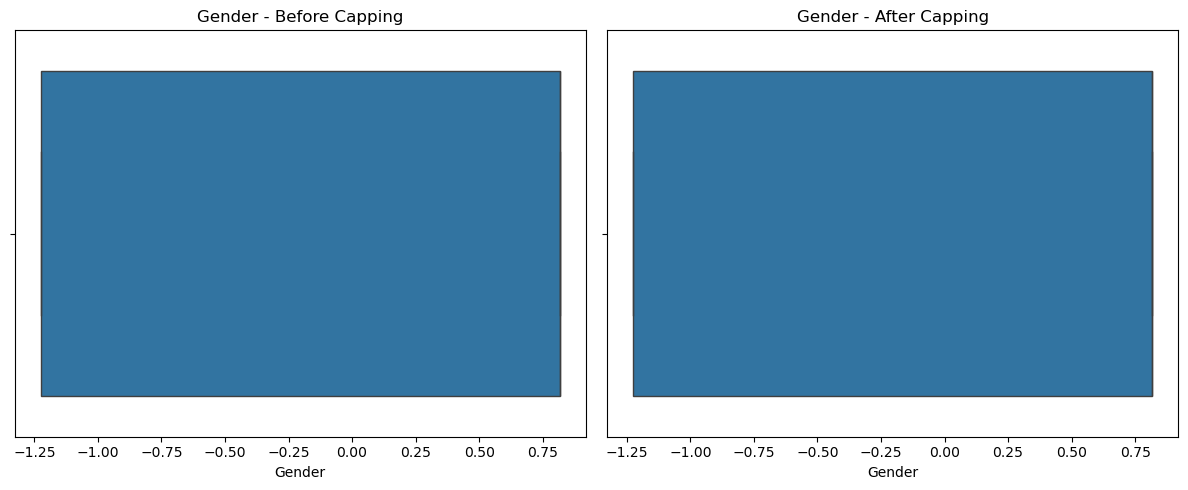

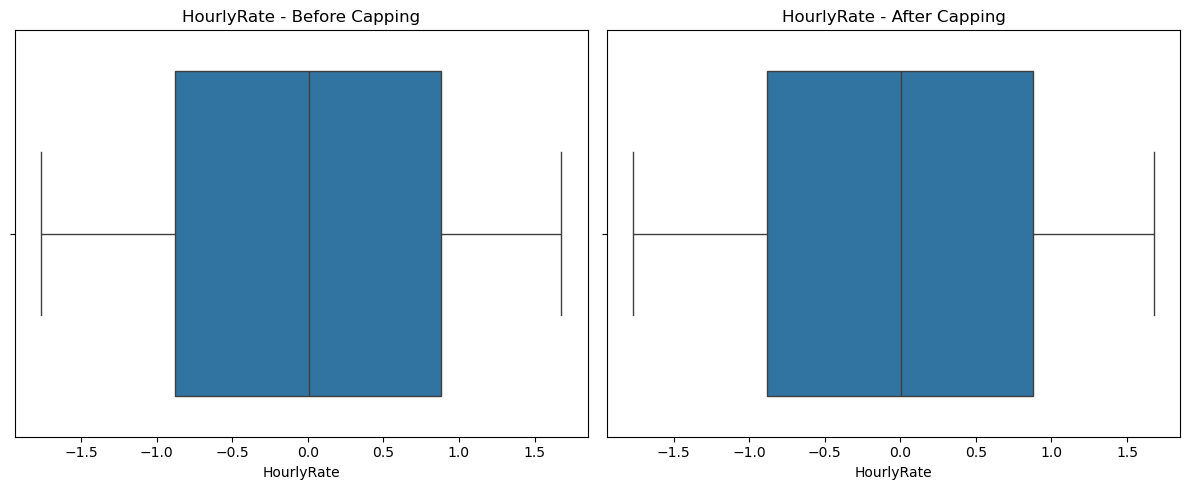

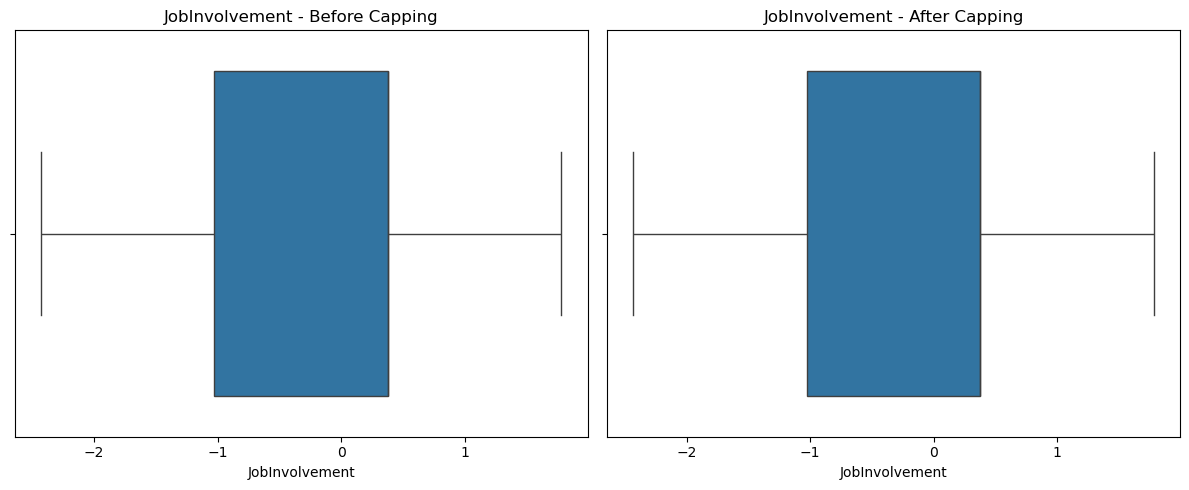

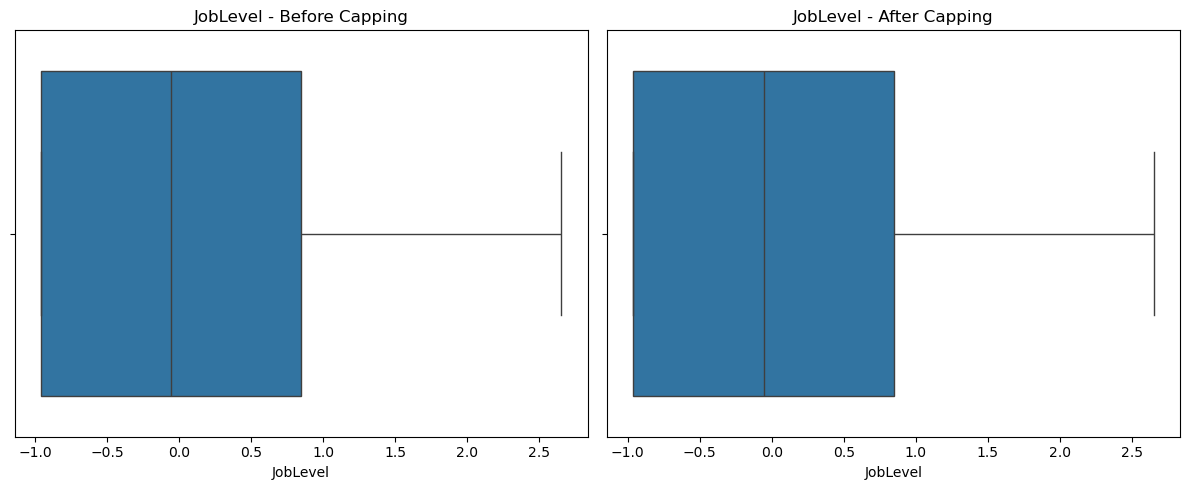

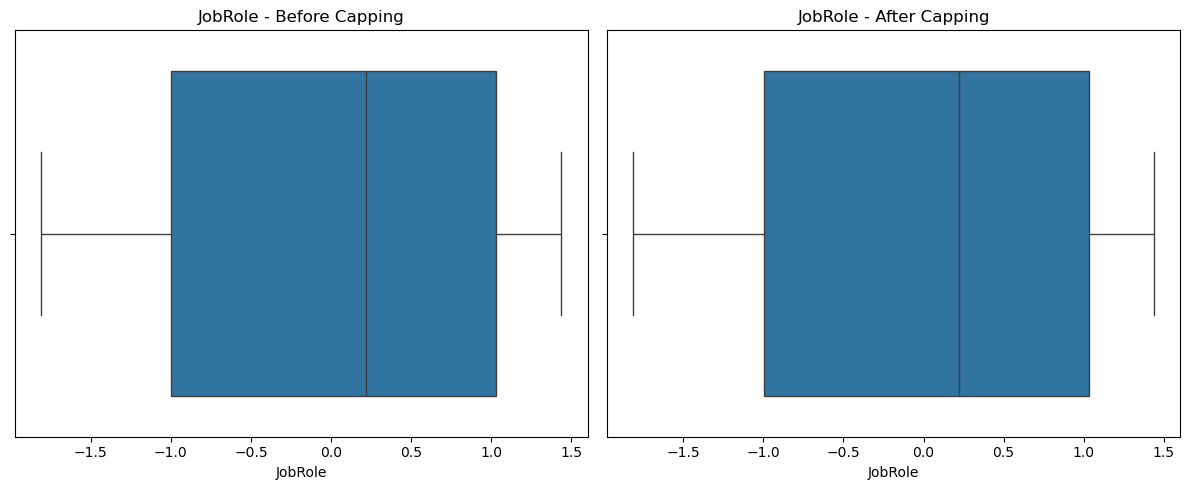

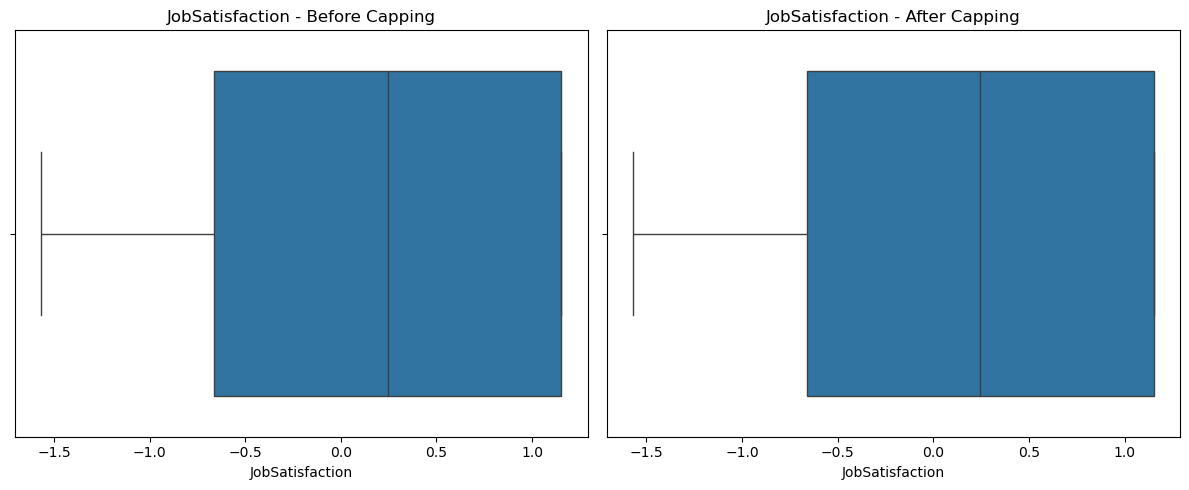

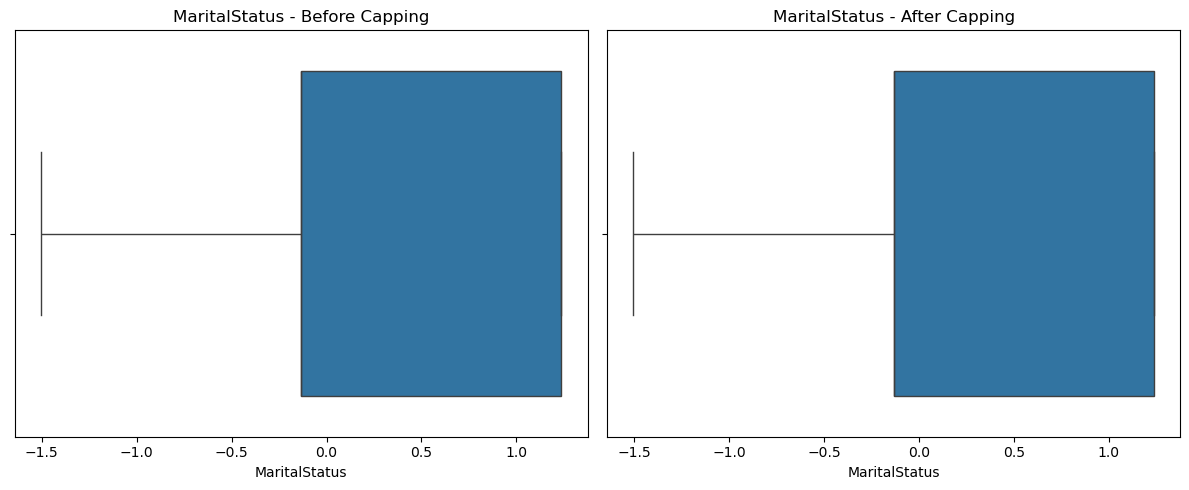

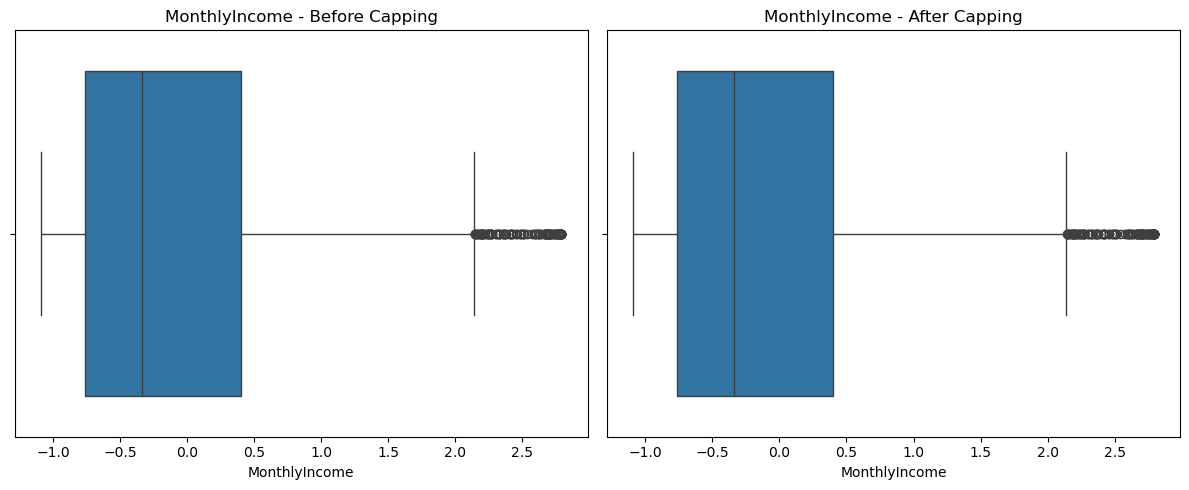

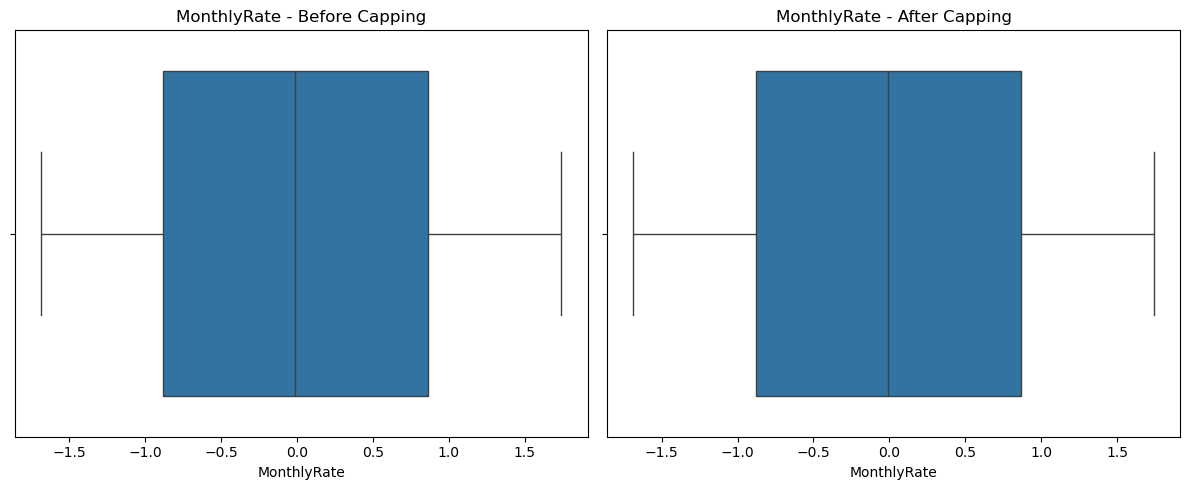

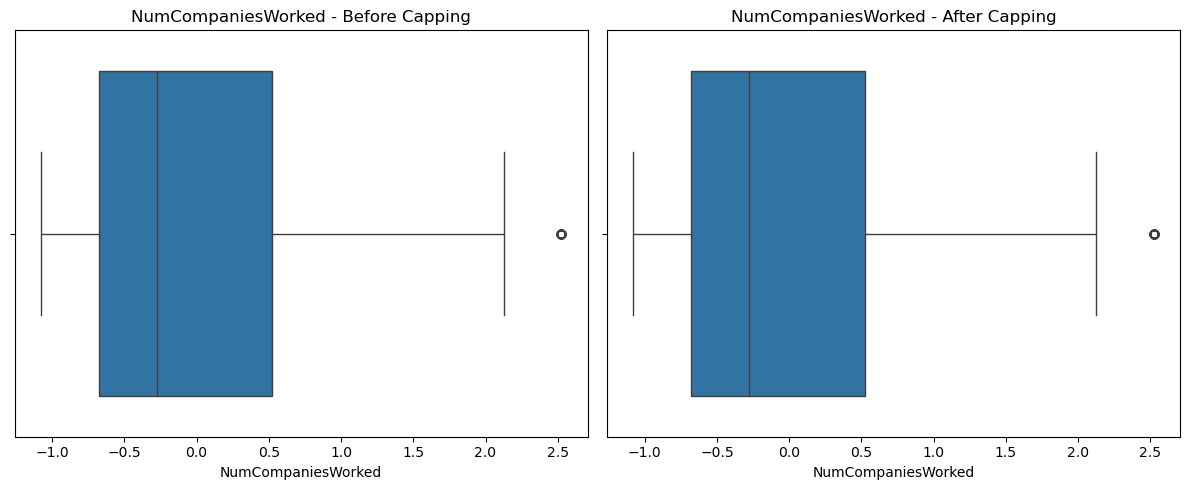

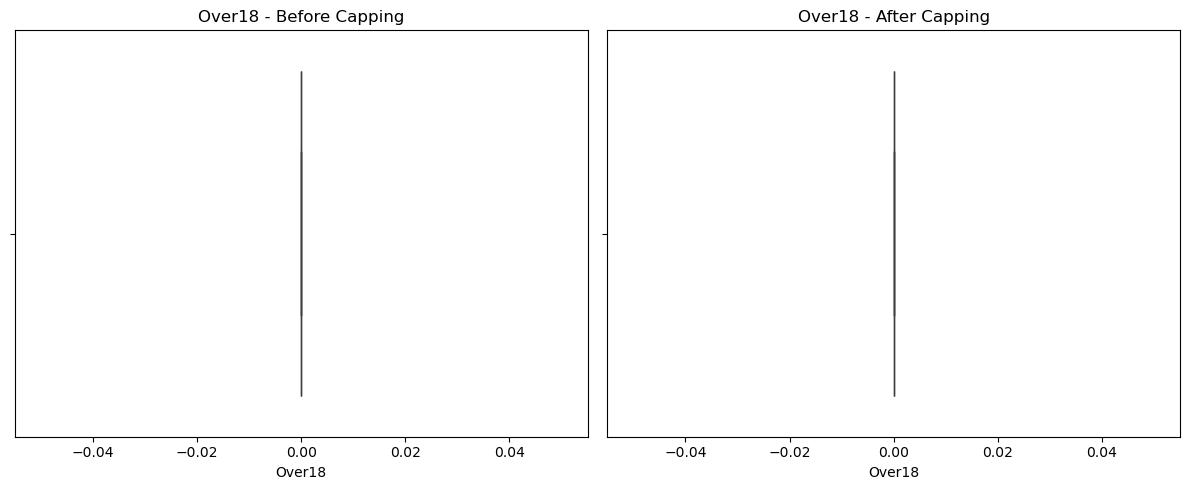

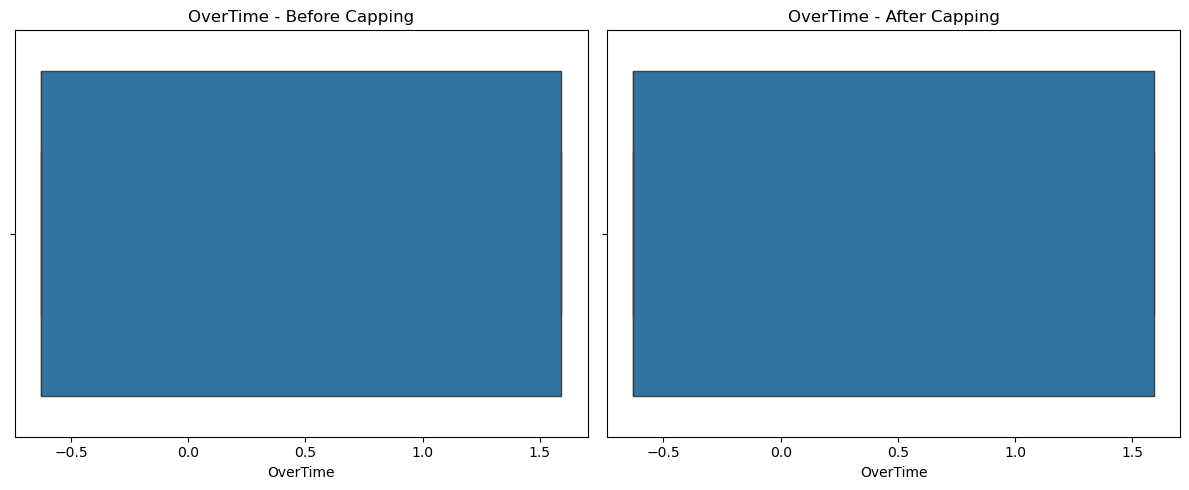

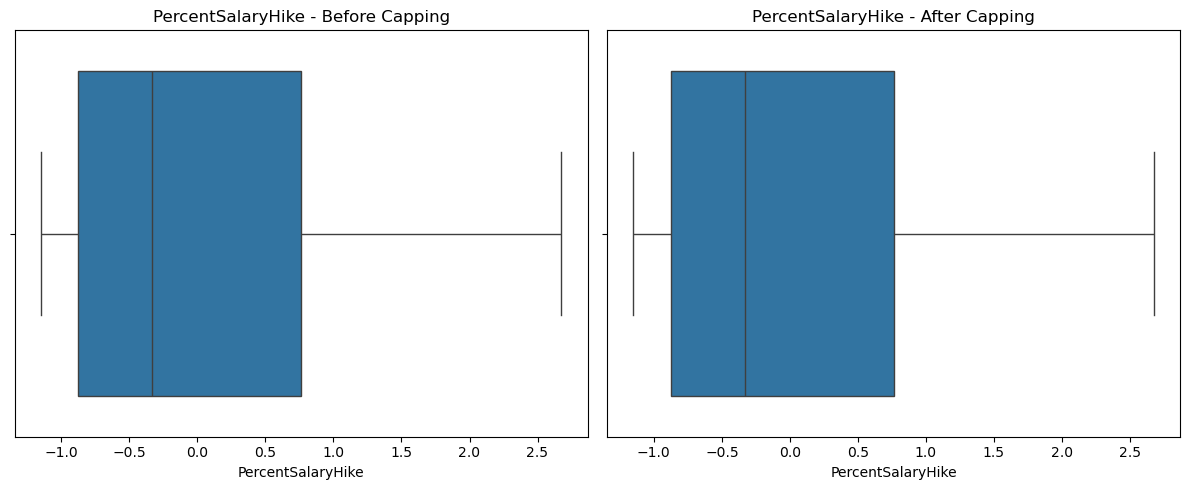

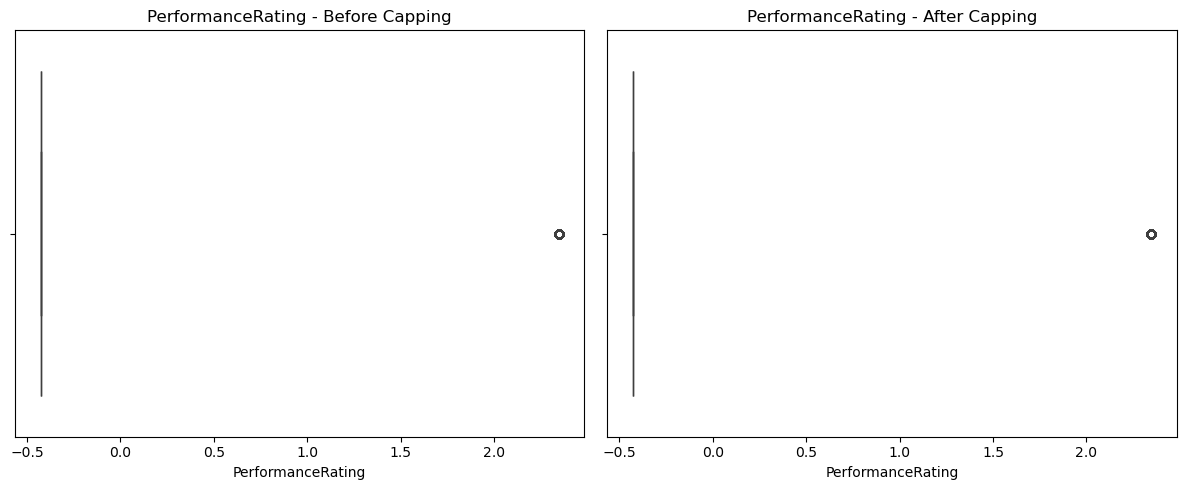

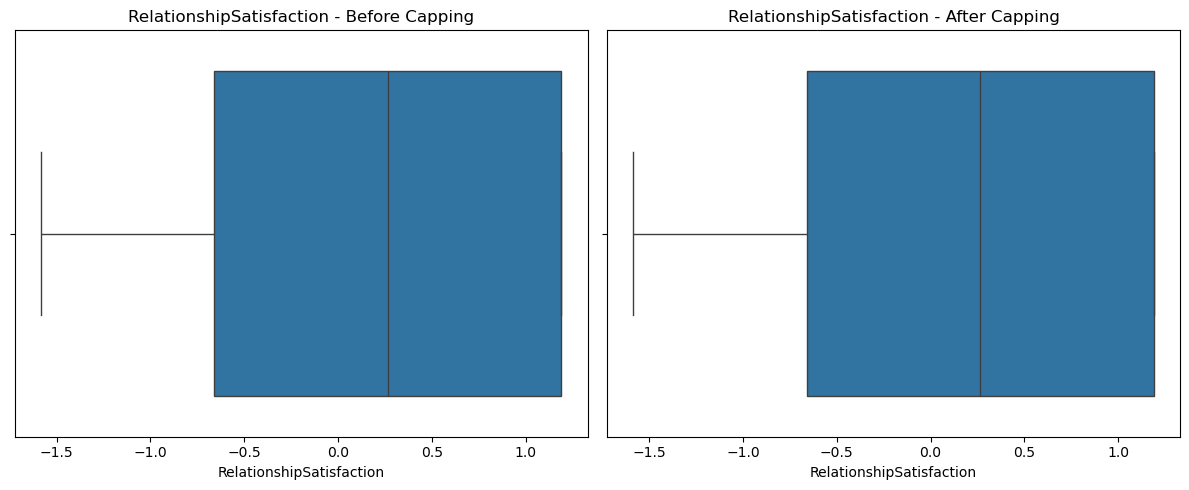

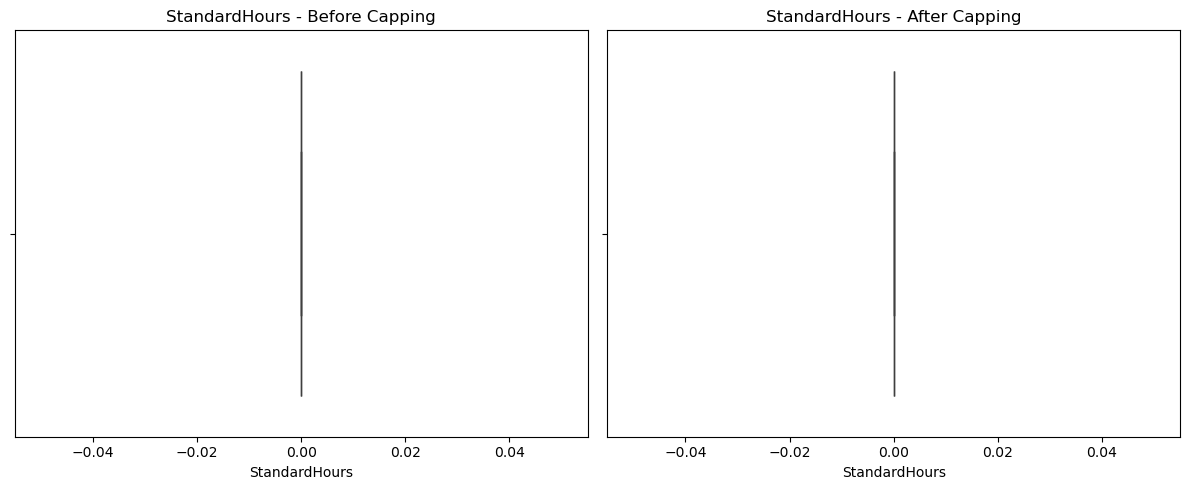

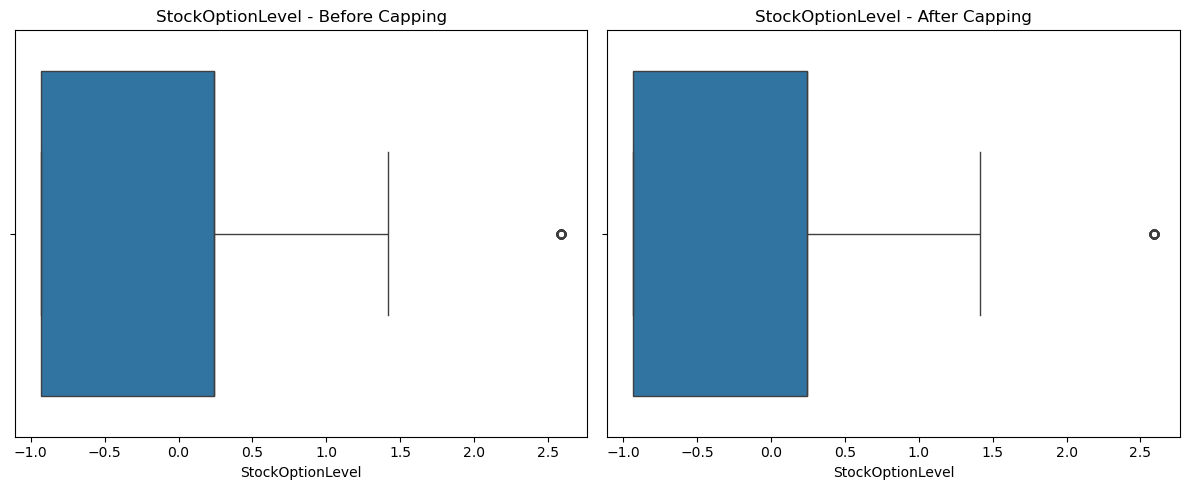

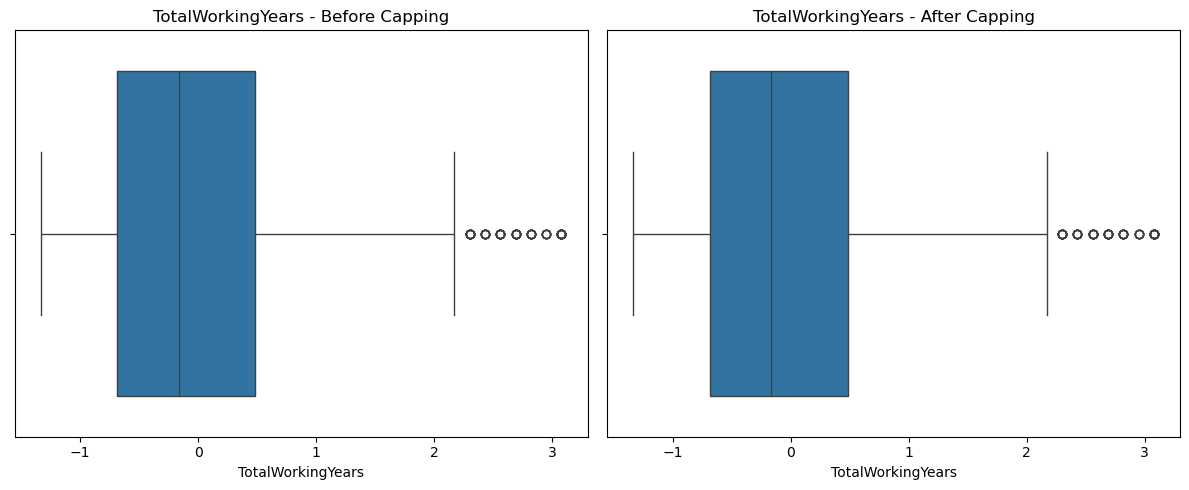

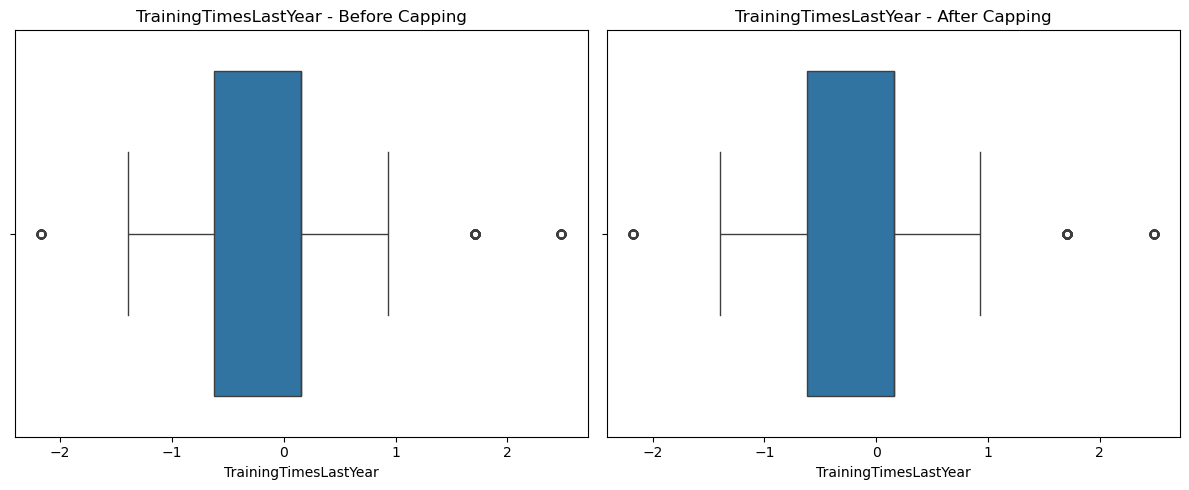

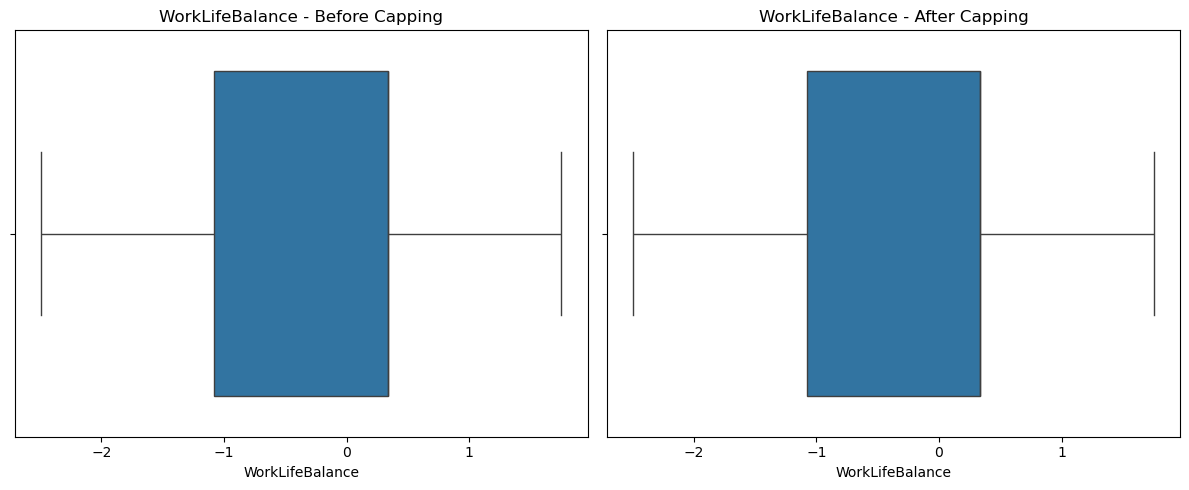

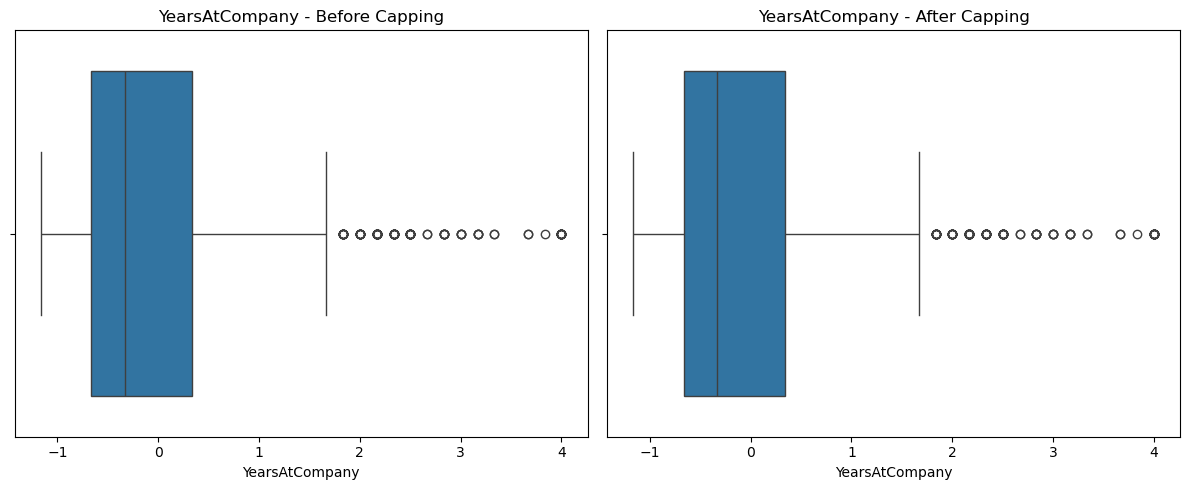

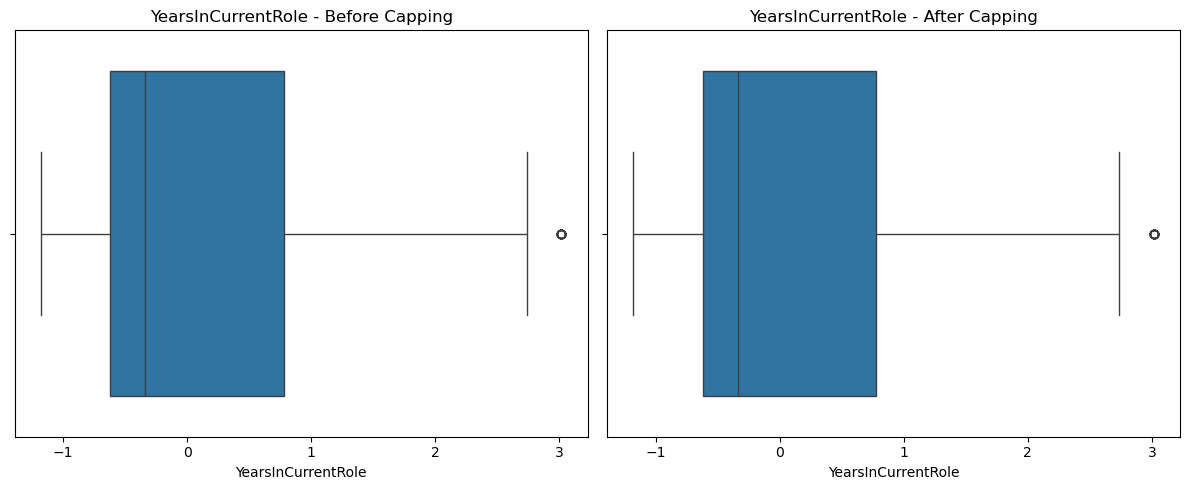

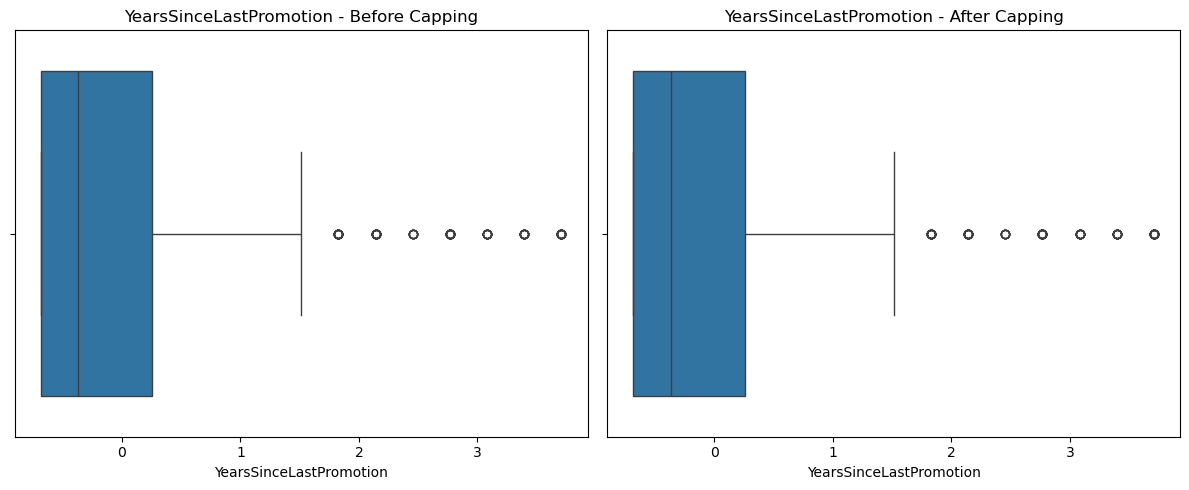

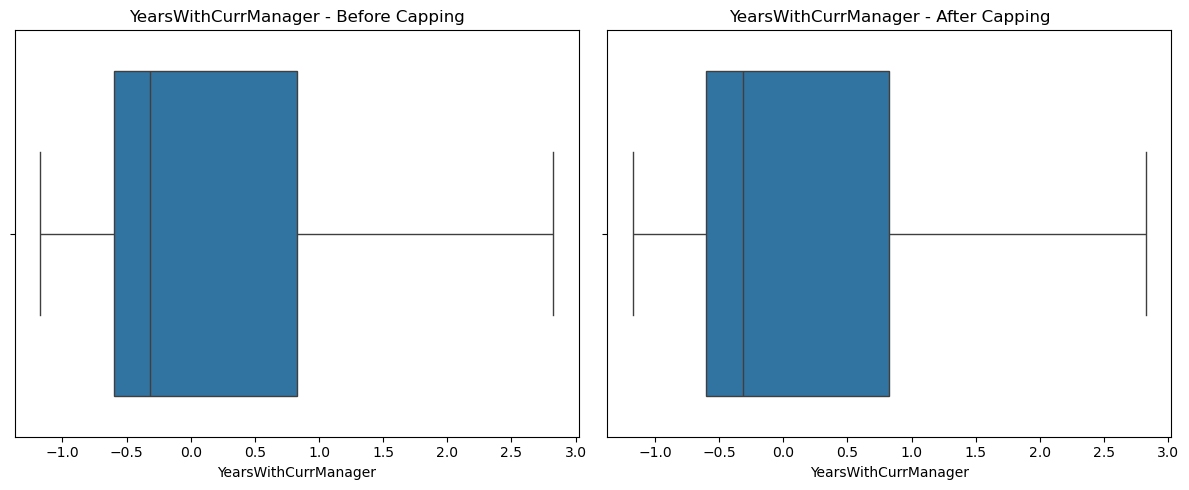

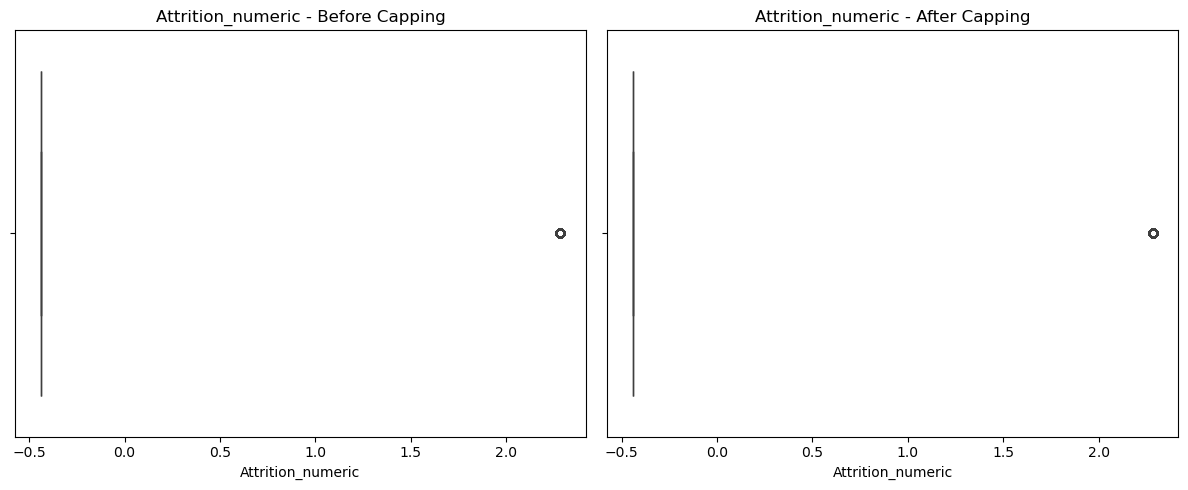

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in features_original.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(12,5))

    # Before capping
    plt.subplot(1,2,1)
    sns.boxplot(x=features_original[col])
    plt.title(f"{col} - Before Capping")

    # After capping
    plt.subplot(1,2,2)
    sns.boxplot(x=features_capped[col])
    plt.title(f"{col} - After Capping")

    plt.tight_layout()
    plt.show()

In [39]:
print("Original:", features_original['MonthlyIncome'].describe())
print("Capped:", features_capped['MonthlyIncome'].describe())

Original: count    1.470000e+03
mean    -1.619264e-16
std      1.000340e+00
min     -1.089811e+00
25%     -7.645157e-01
50%     -3.371845e-01
75%      3.991530e-01
max      2.792742e+00
Name: MonthlyIncome, dtype: float64
Capped: count    1470.000000
mean        0.000015
std         1.000322
min        -1.088263
25%        -0.764516
50%        -0.337185
75%         0.399153
max         2.792696
Name: MonthlyIncome, dtype: float64


Using IQR method

In [40]:
def cap_outliers_iqr(df):
    df_capped = df.copy()
    for col in df_capped.select_dtypes(include=[np.number]).columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped[col] = np.clip(df_capped[col], lower_bound, upper_bound)
    return df_capped

features_iqr_capped = cap_outliers_iqr(features.copy())  # Apply IQR capping

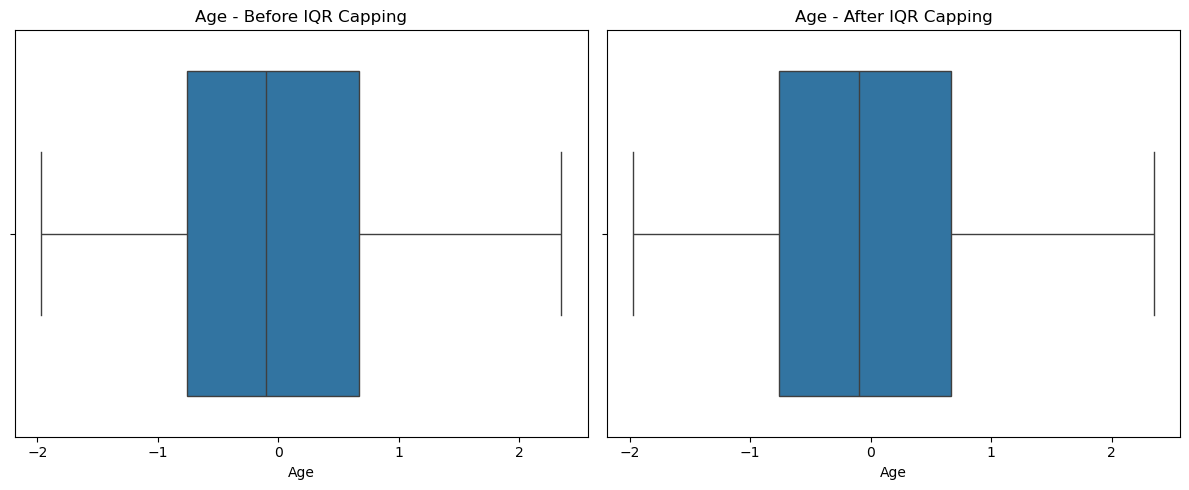

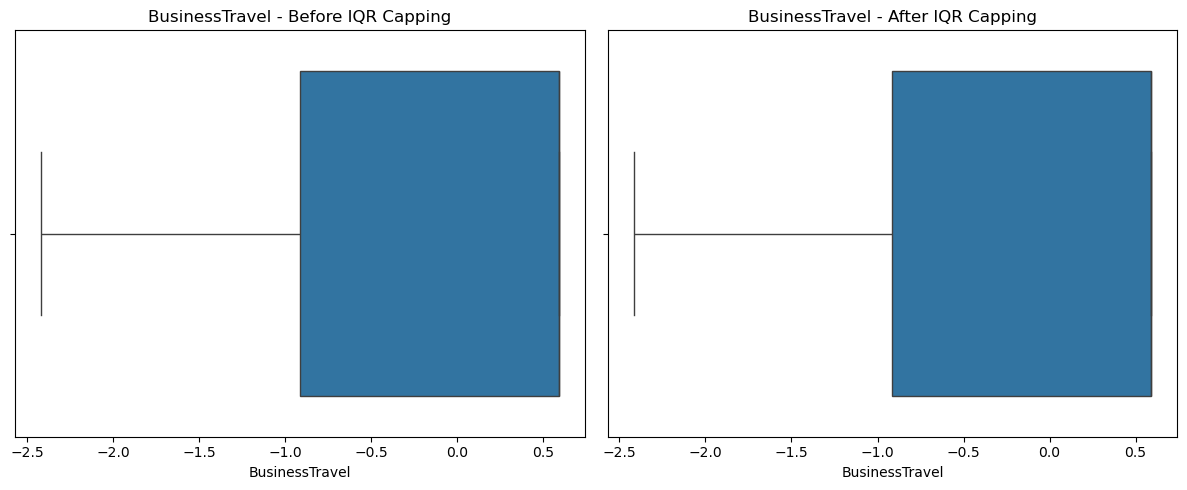

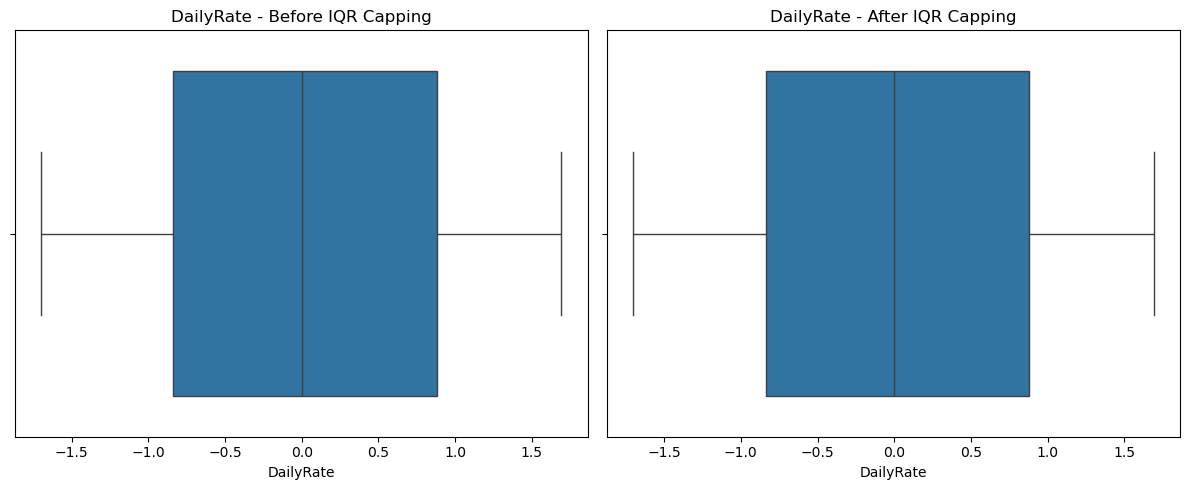

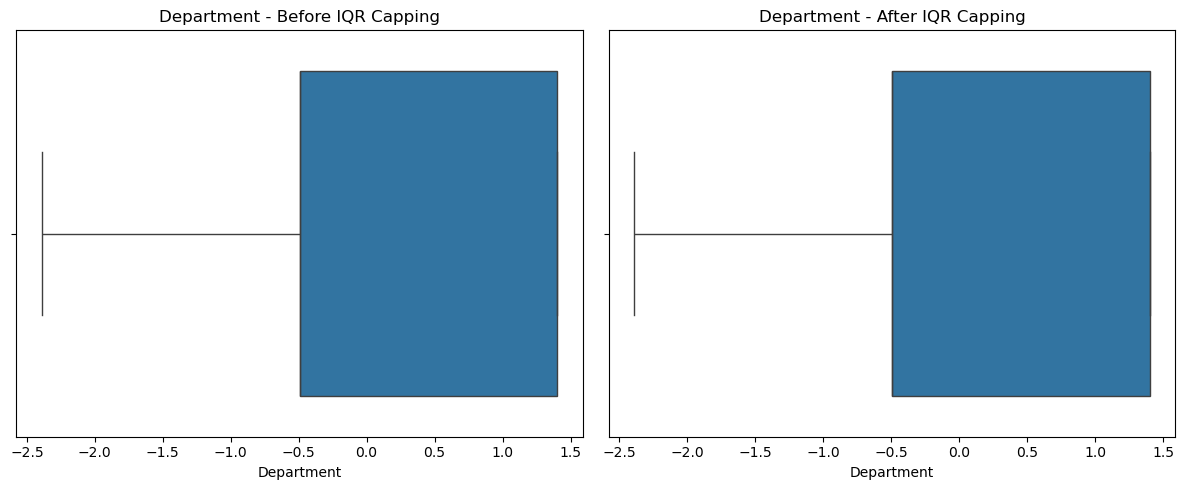

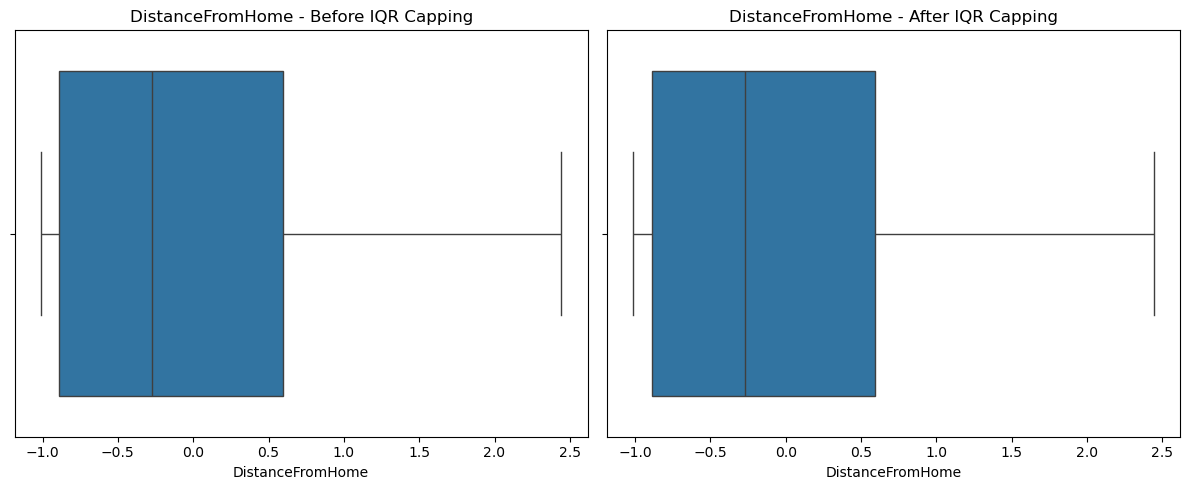

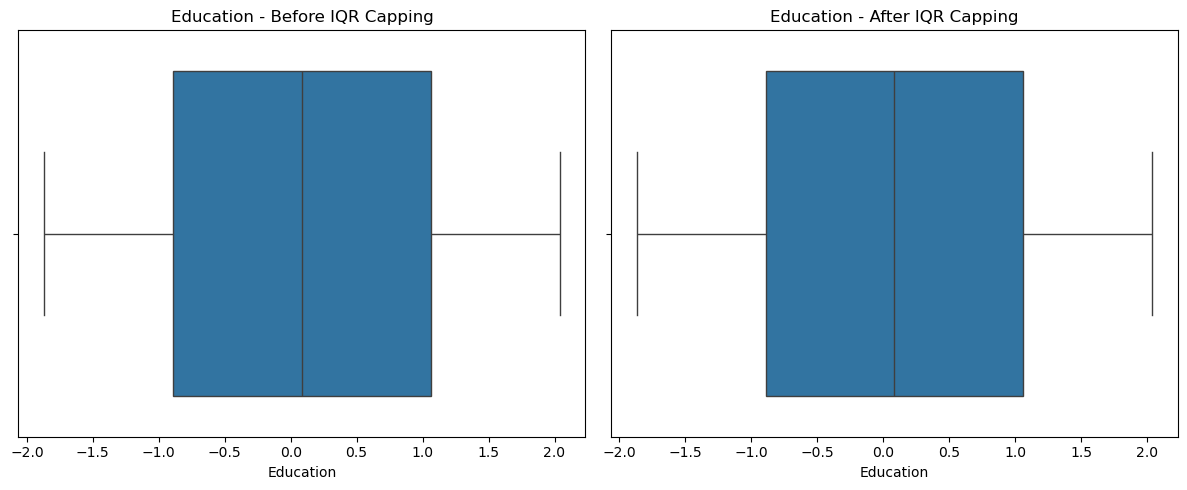

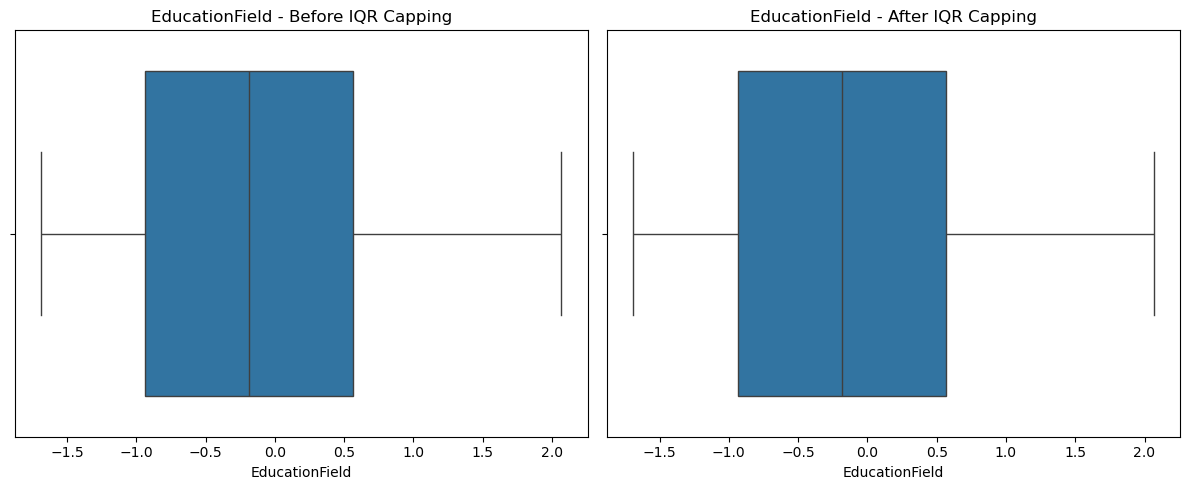

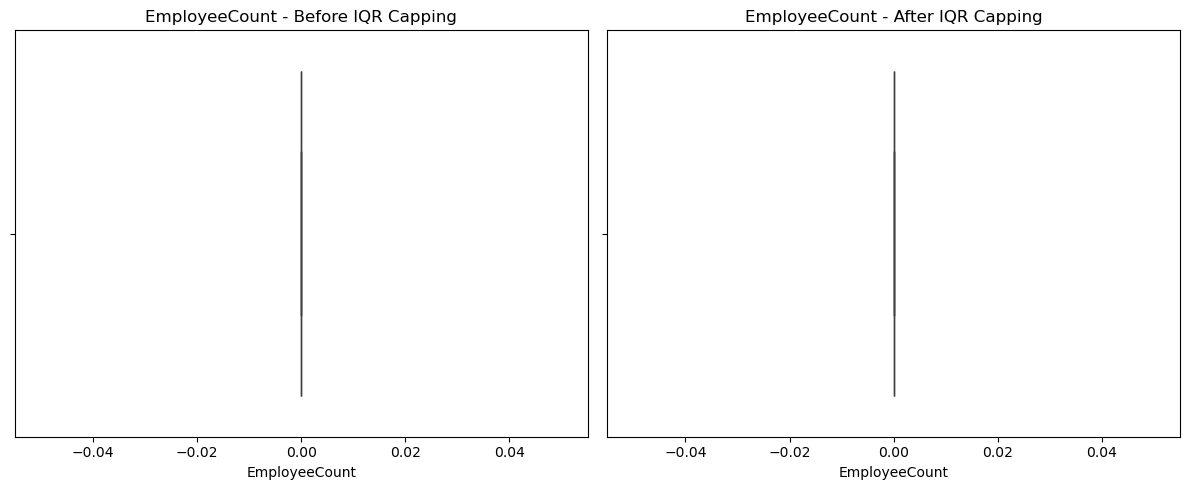

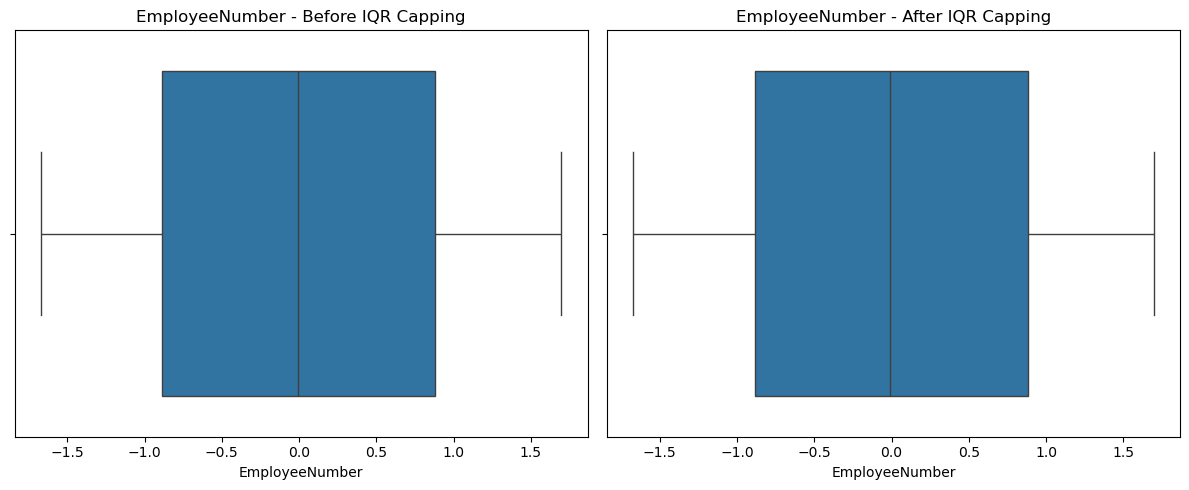

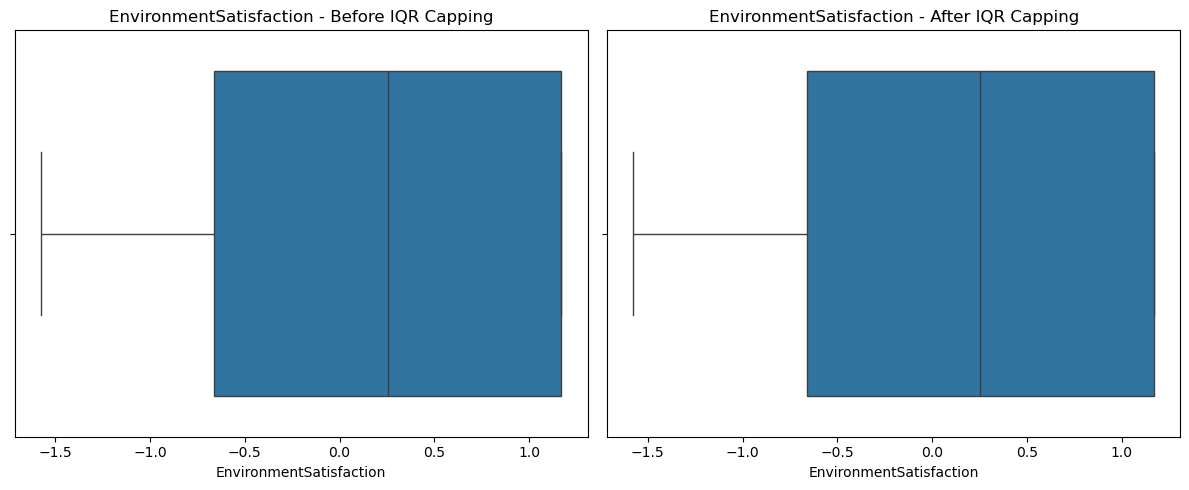

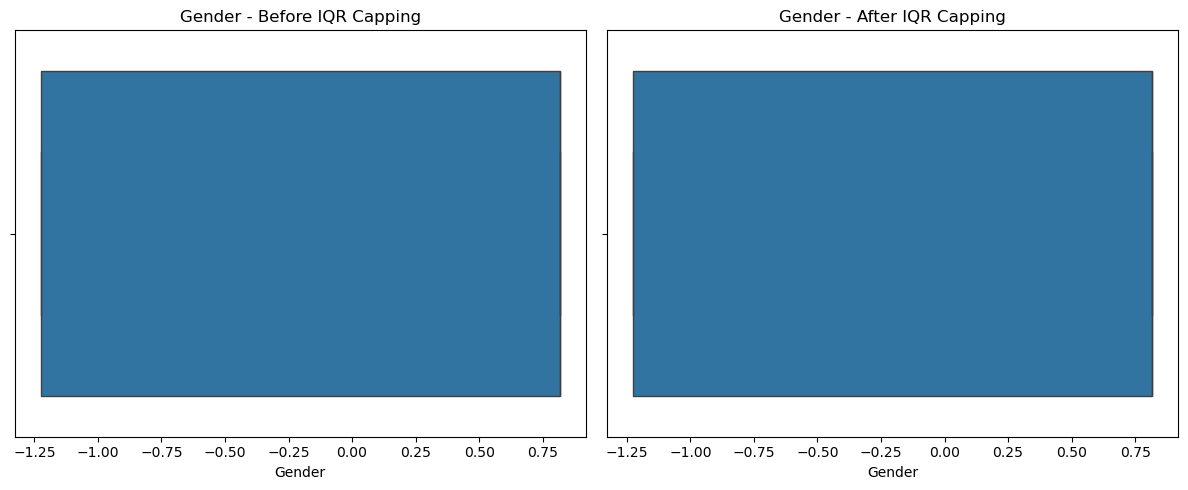

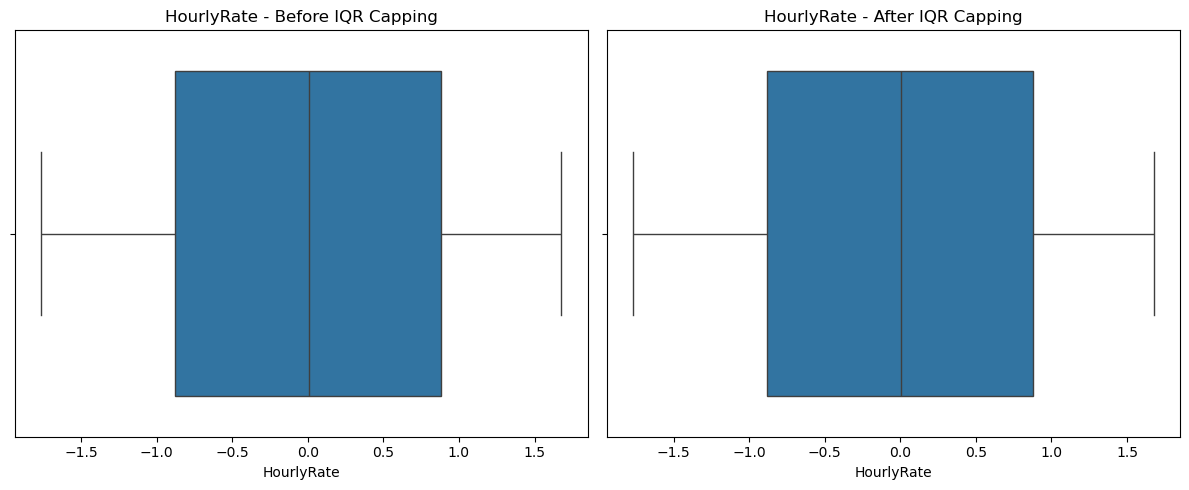

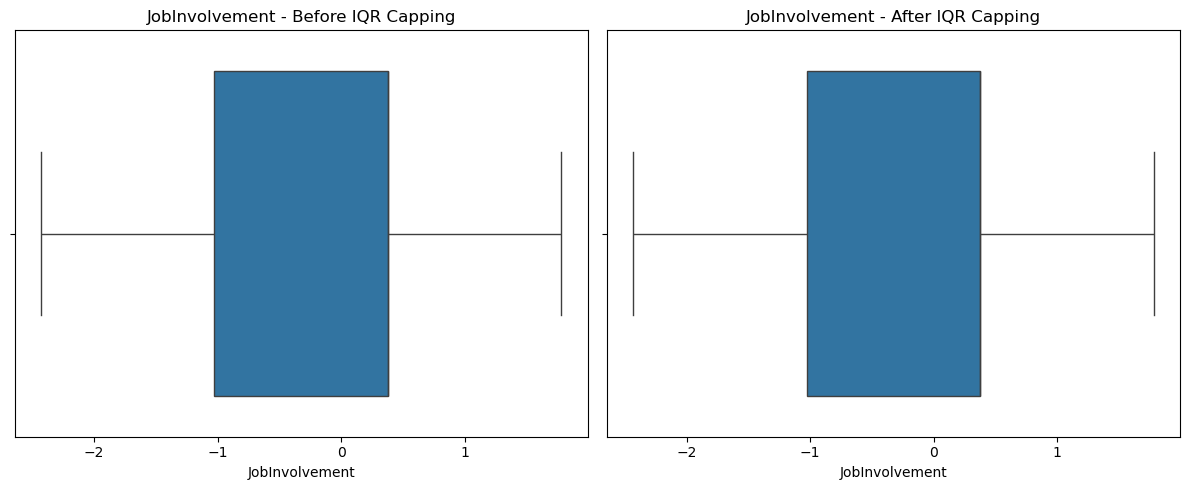

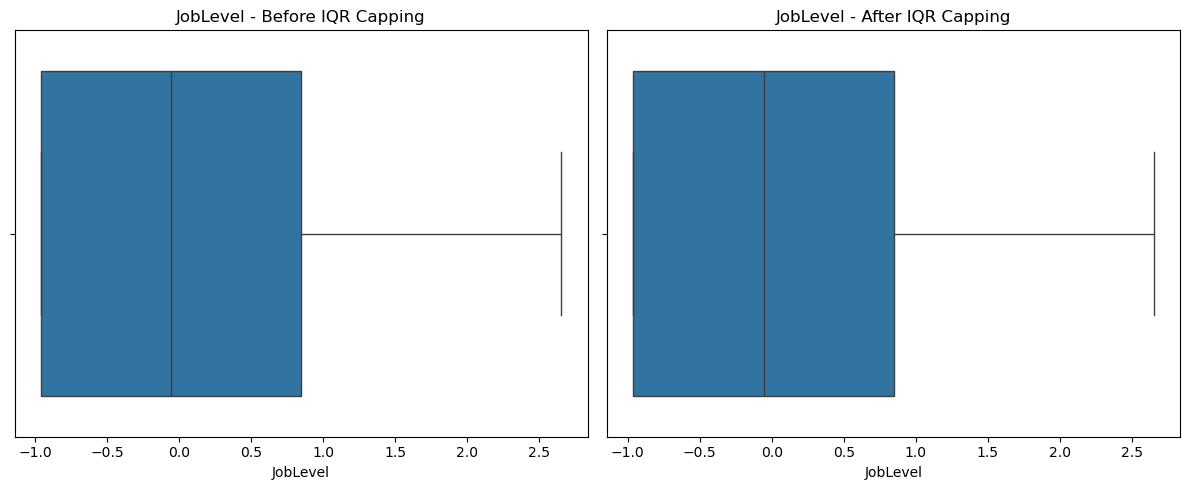

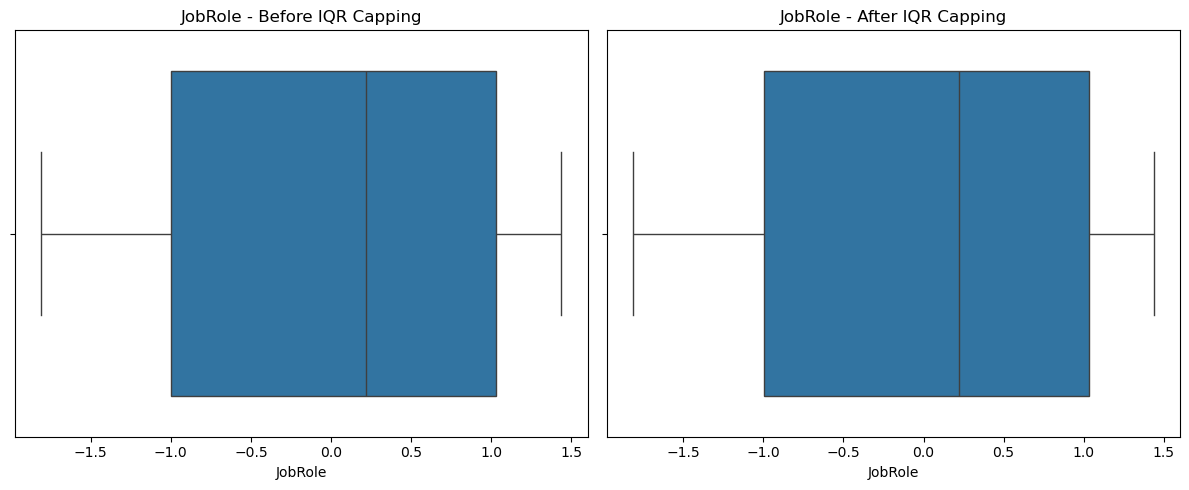

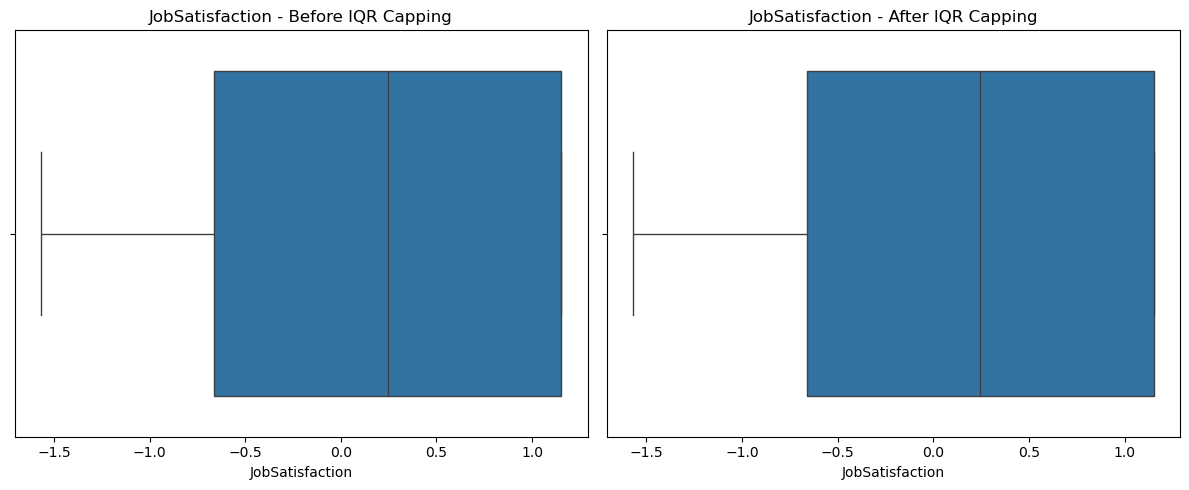

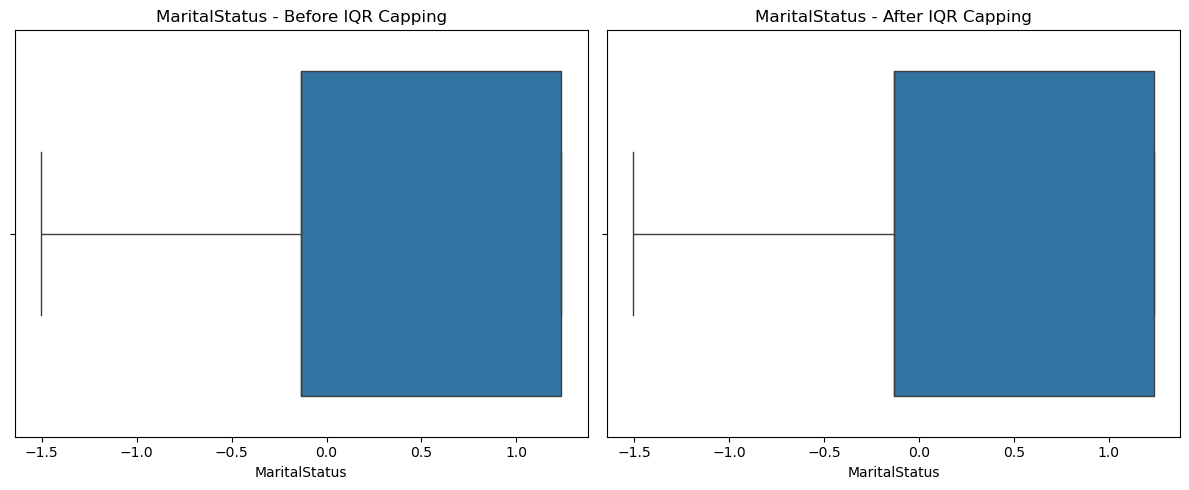

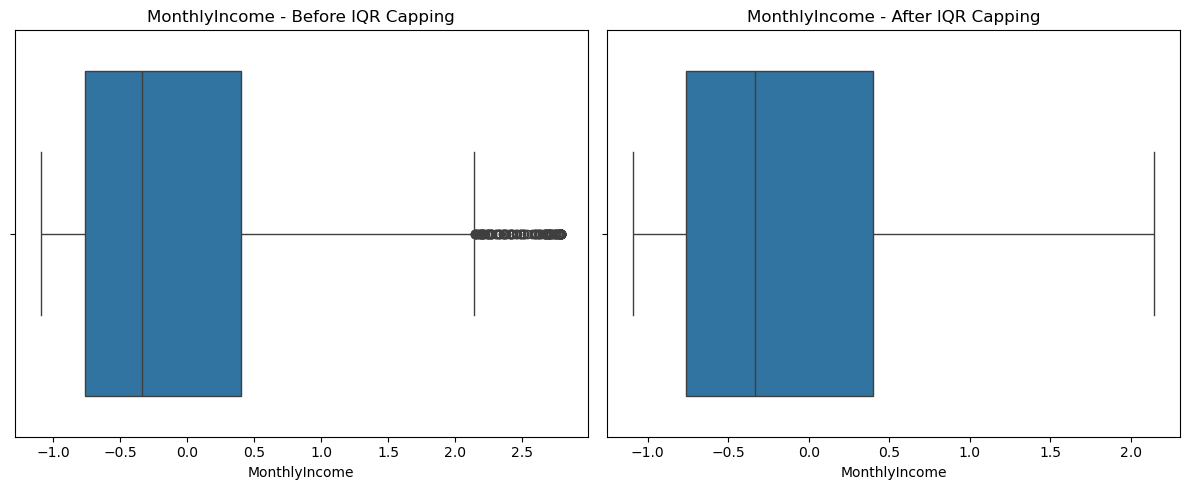

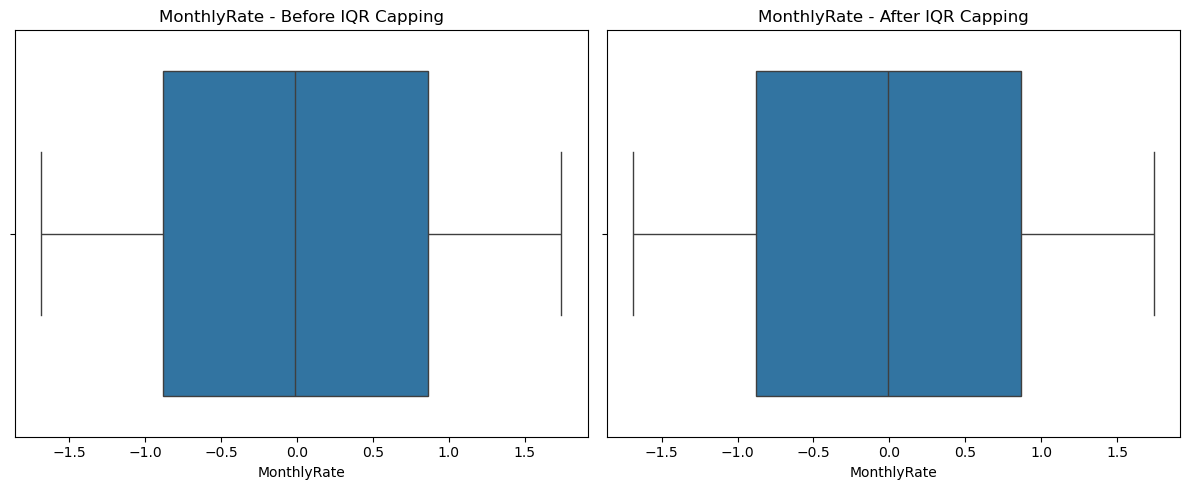

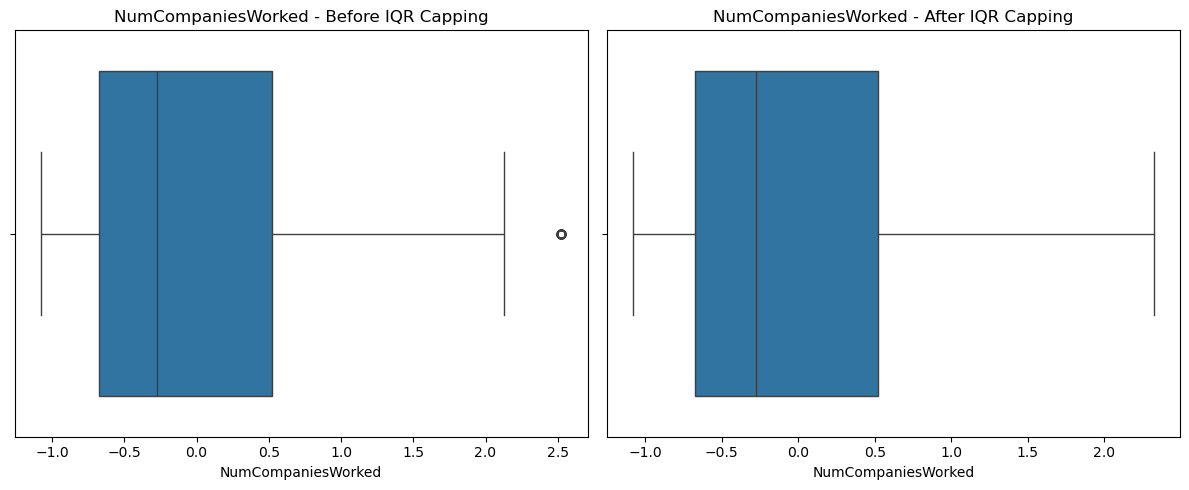

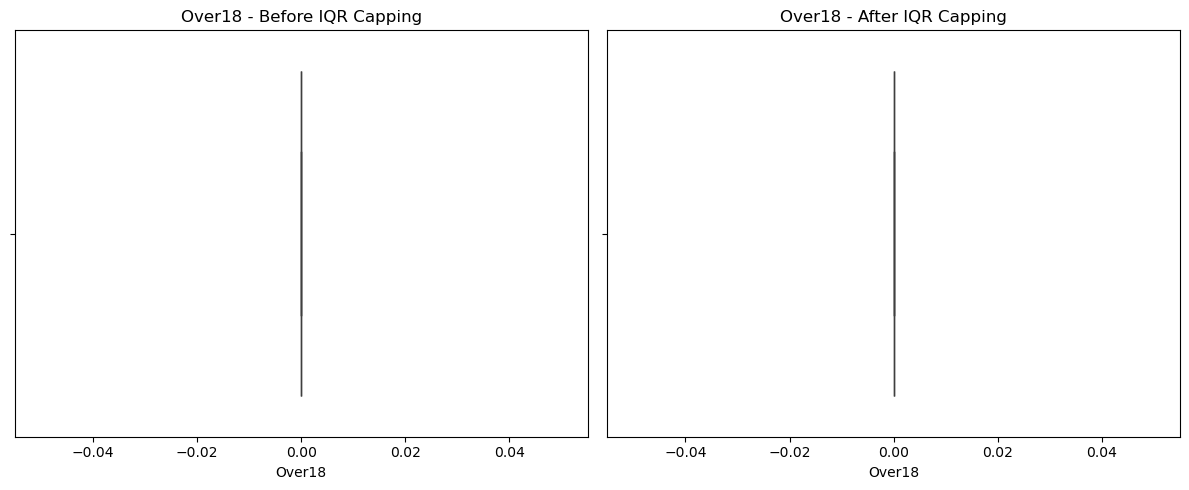

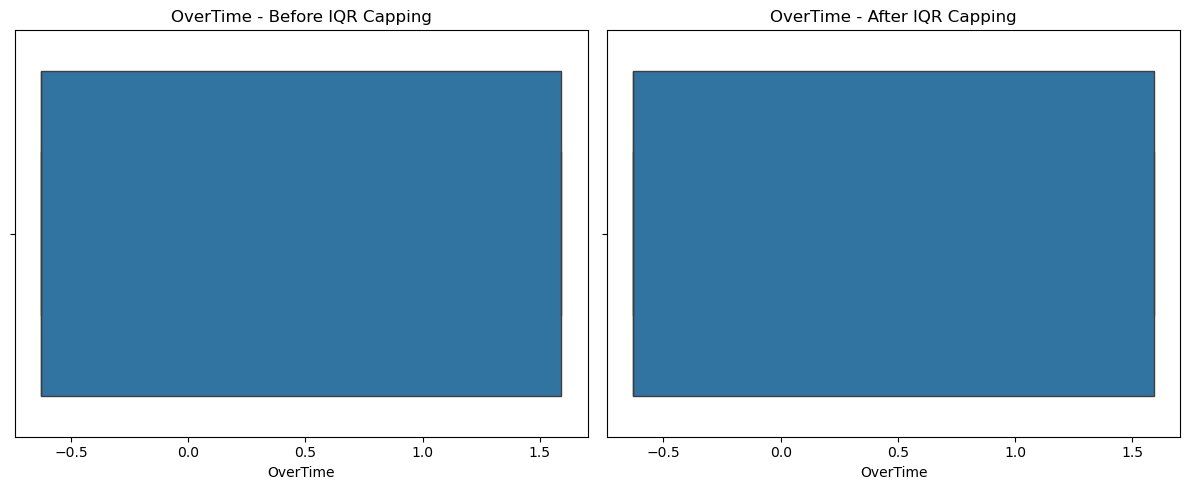

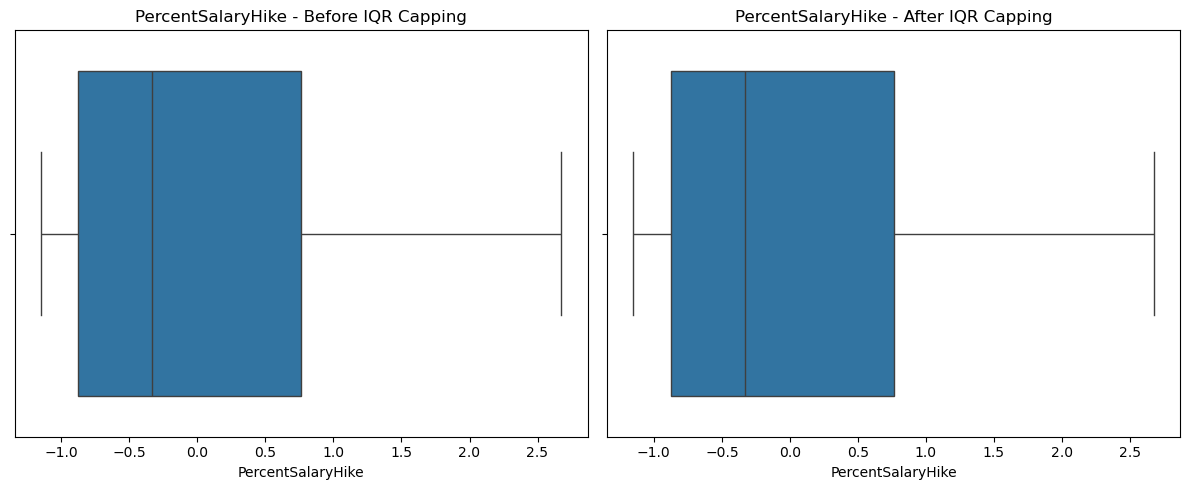

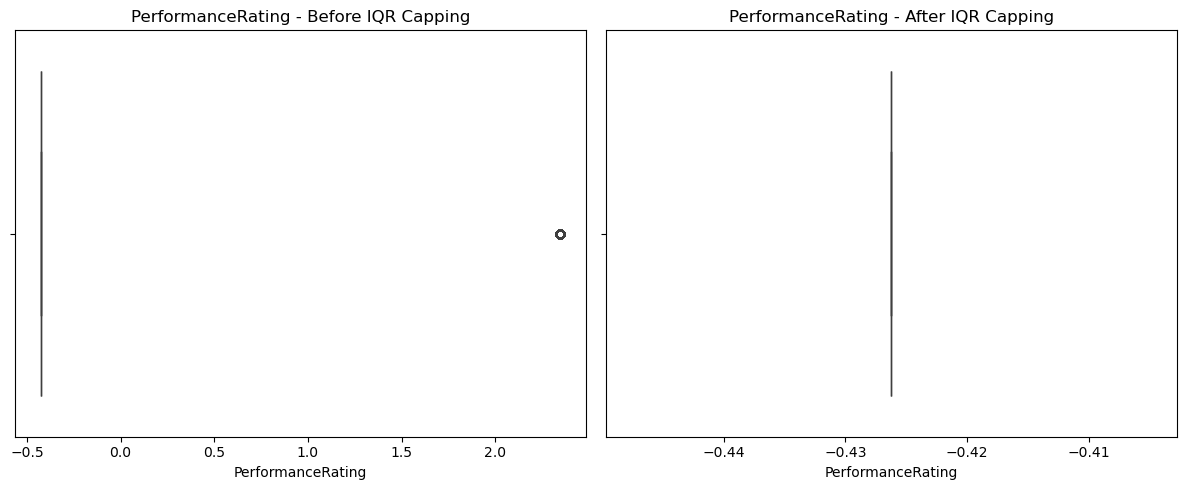

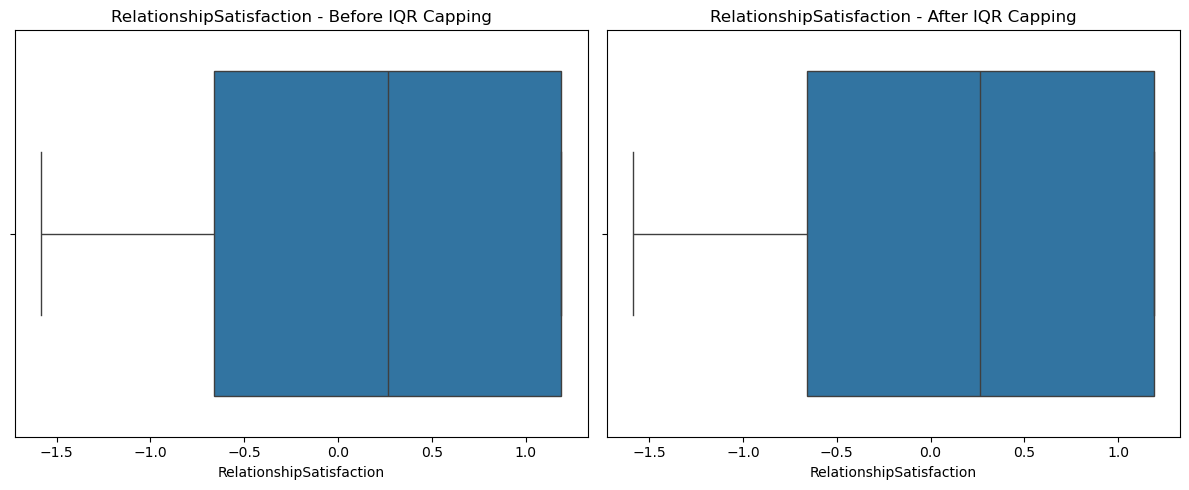

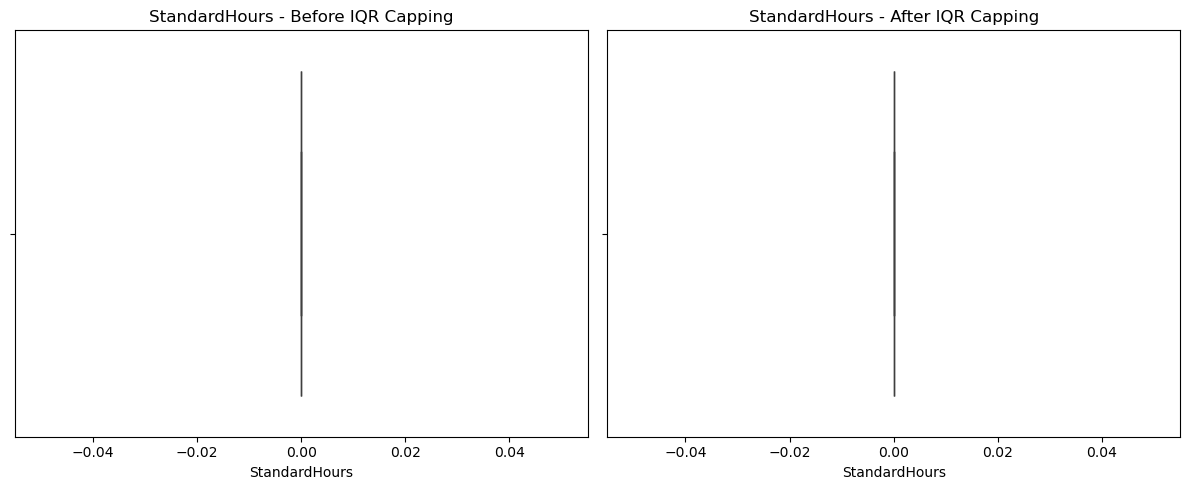

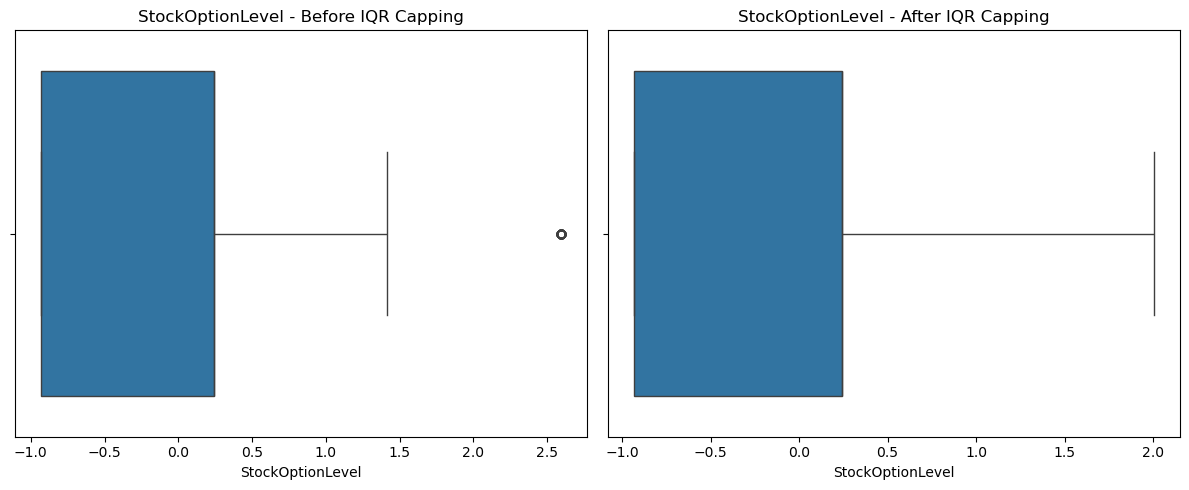

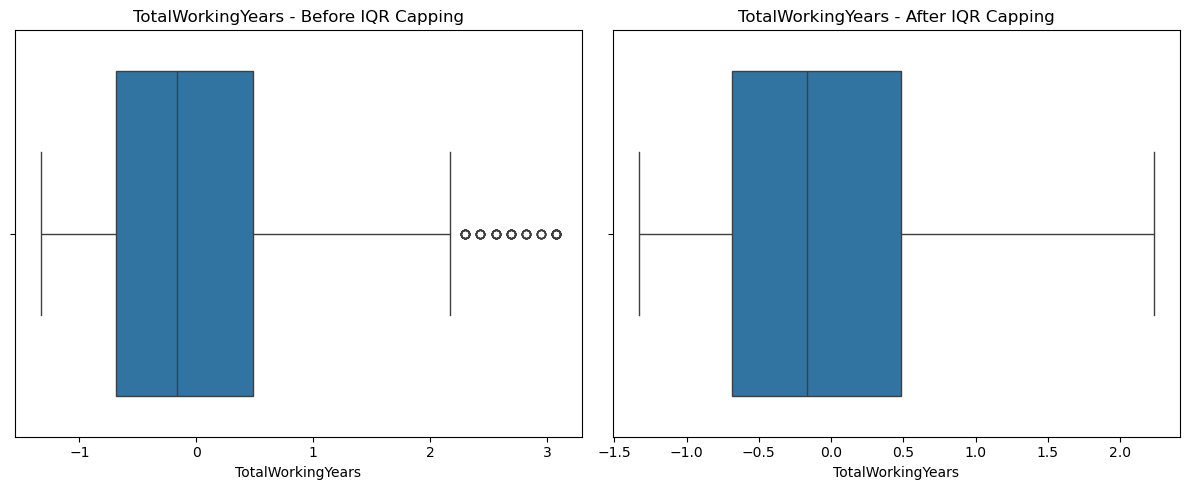

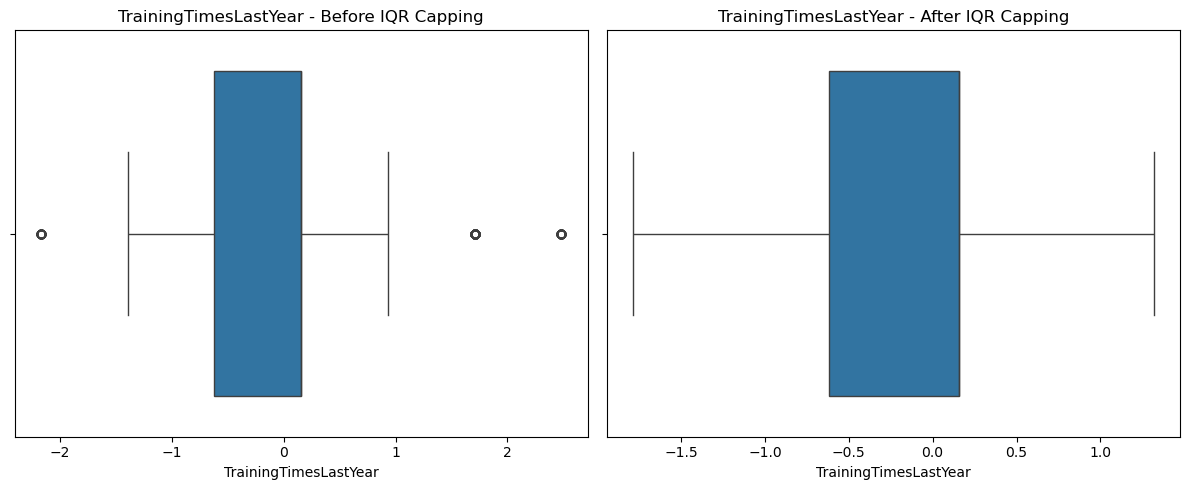

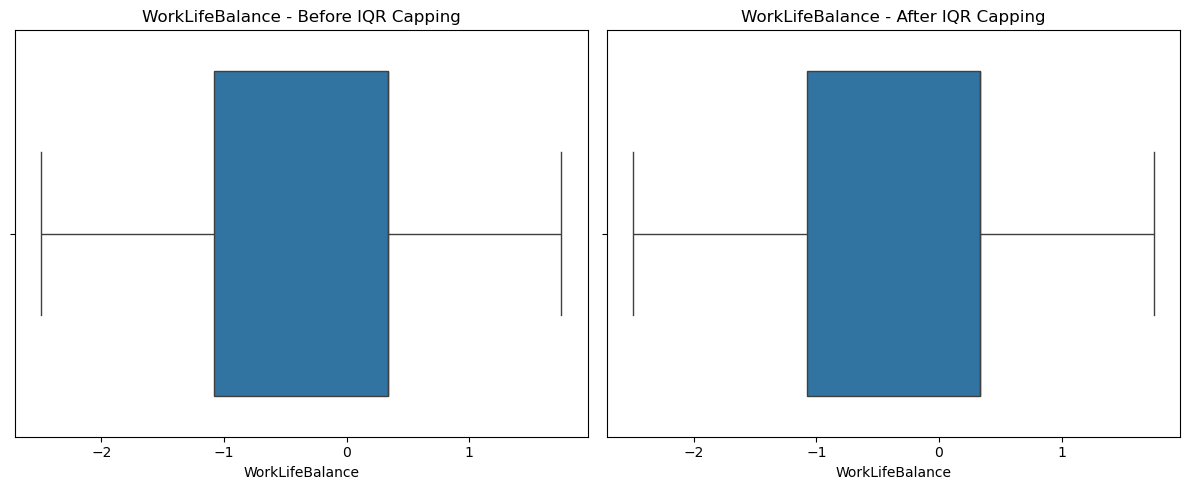

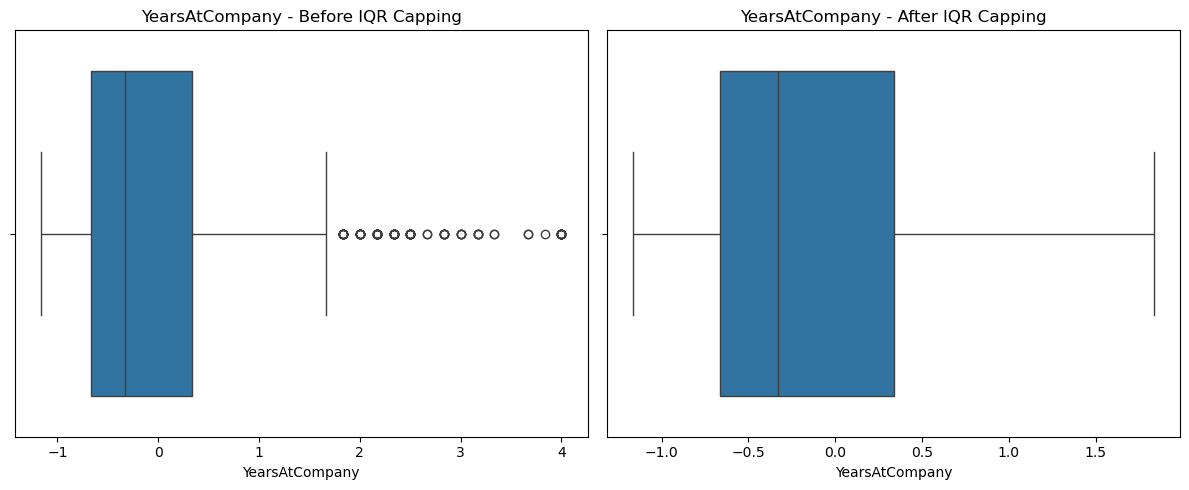

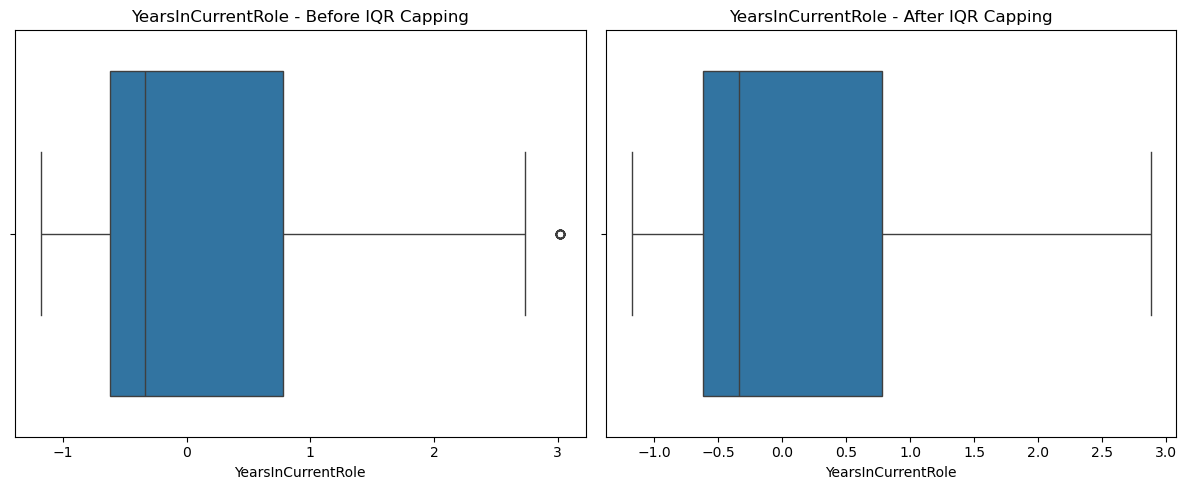

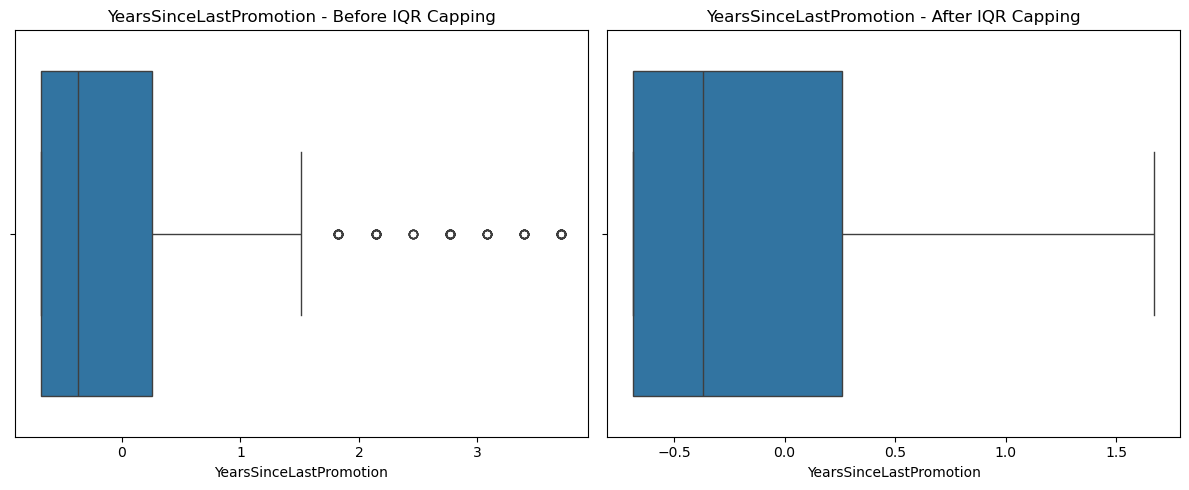

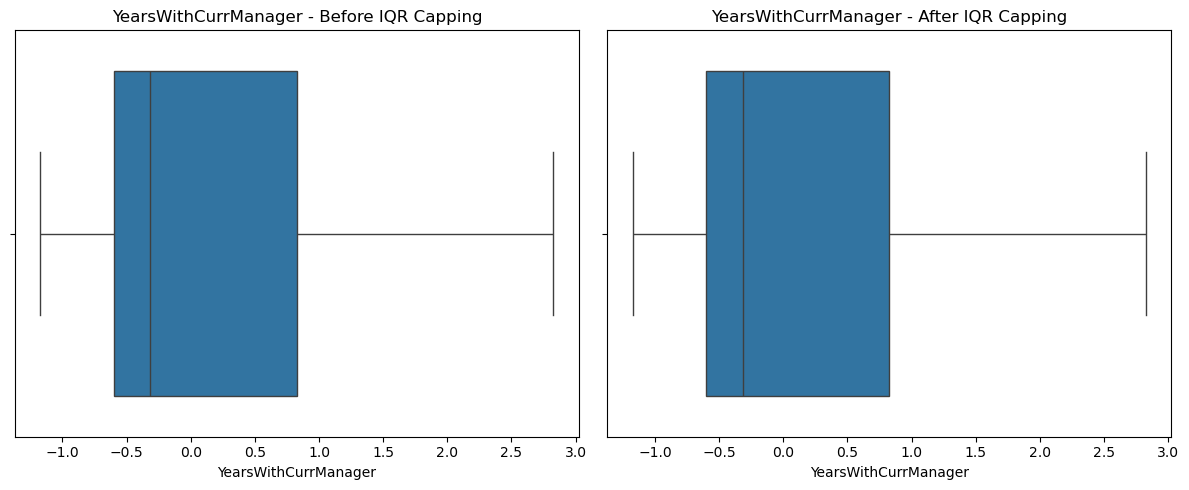

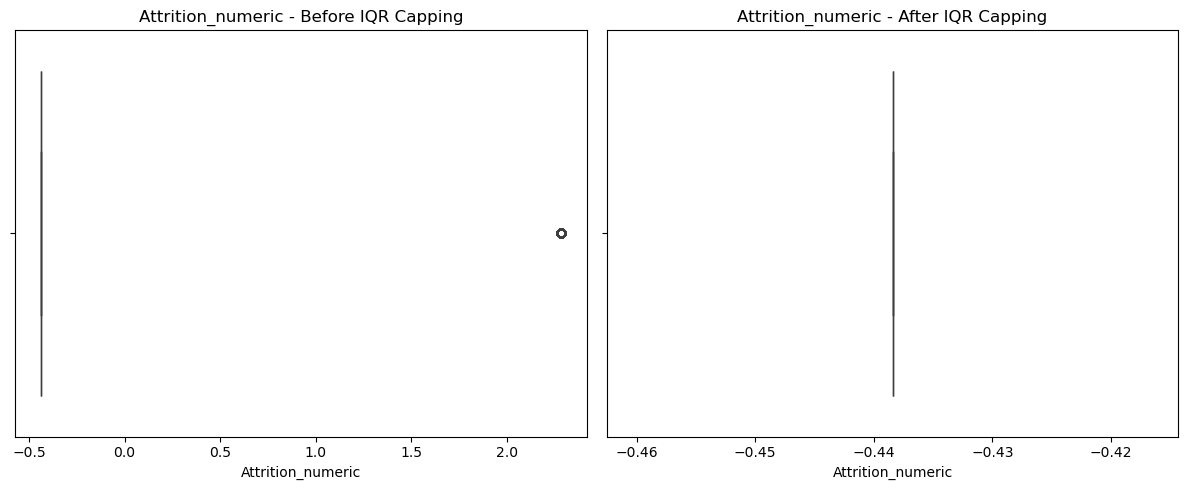

In [41]:
for col in features_original.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(12,5))

    # Before capping
    plt.subplot(1,2,1)
    sns.boxplot(x=features_original[col])
    plt.title(f"{col} - Before IQR Capping")

    # After capping
    plt.subplot(1,2,2)
    sns.boxplot(x=features_iqr_capped[col])
    plt.title(f"{col} - After IQR Capping")

    plt.tight_layout()
    plt.show()

In [42]:
print("Original:", features_original['MonthlyIncome'].describe())
print("Capped:", features_iqr_capped['MonthlyIncome'].describe())

Original: count    1.470000e+03
mean    -1.619264e-16
std      1.000340e+00
min     -1.089811e+00
25%     -7.645157e-01
50%     -3.371845e-01
75%      3.991530e-01
max      2.792742e+00
Name: MonthlyIncome, dtype: float64
Capped: count    1470.000000
mean       -0.029643
std         0.925897
min        -1.089811
25%        -0.764516
50%        -0.337185
75%         0.399153
max         2.144656
Name: MonthlyIncome, dtype: float64


Original (after scaling)

Mean ≈ 0, Std ≈ 1 → StandardScaler normalized the distribution.

Max = 2.79 → some employees had very high incomes, pulling the distribution wide.

After IQR capping:

Mean shifted slightly (-0.03) → because extreme high values were clipped downward.

Std dropped (0.93 vs 1.00) → variability reduced, distribution became tighter.

Max dropped (2.14 vs 2.79) → the extreme high earners were clipped to the IQR upper bound.

Quartiles (25%, 50%, 75%) stayed the same → the bulk of the data wasn’t touched, only the tails.

Scale numerical features,Only scale the features, not the target

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns
features[numerical_features] = scaler.fit_transform(features[numerical_features])

Recombine to save in one file

In [44]:
df_scaled=pd.concat([features,target], axis=1)
df_scaled.to_csv(r"D:\\Employee Attrition\Employee_Attrition_Scaled.csv", index=False)


Read back for modeling

In [45]:
df_modeled=pd.read_csv(r"D:\\Employee Attrition\Employee_Attrition_Scaled.csv")
x=df_modeled.drop('Attrition', axis=1)#features
y=df_modeled['Attrition']#target